## _Table of Contents 📋_
1. [Importing Libraries](#CH-1)
2. [Data Importing](#CH-2)
    * Data Quality
        * Handling Duplicate Rows and Columns
        * Missing Values
        * Uniqueness
    * Basic Modeification on DataFrame
    * Data Describing
    * Dataset Description
    * Feature Definition
3. [Exploratory Data Analysis](#CH-3)
    * Correlation Matrix
    * Univariate Analysis & Bi-variate Analysis
    * Multi-Variate Analysis
4. [Feature Engineering](#CH-4)
    * Train-Test Split
    * Outiler Detection and Treatment
    * Feature Transformation
    * Feature Scaling
    * Feature Encoding
5. [Linear Regression](#CH-5)
    * Building Model
    * Model Evaluation
6. [Ridge Regression](#CH-6)
    * Building Model + Cross-Validation + Hyper-Parameter Tuning
    * Model Evaluation
7. [Lasso Regression](#CH-7)
    * Building Model + Cross-Validation + Hyper-Parameter Tuning
    * Model Evaluation
8. [Results and Discussion](#CH-8)
    * Visualizing Model Performance
    * Comparison of models
9. [Way Forward](#CH-9)

<div style="color:white;
           display:fill;
           border-radius:20px;
           background-color:#FFA500;
           font-size:200%;
           font-family:Verdana;
           letter-spacing:1px">
<a class="anchor" id="CH-1"></a> 
<p style="padding: 10px;
              color:white;">
              1. Importing Libraries 📚
</p>
</div>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

from scipy import stats
import pylab

<div style="color:white;
           display:fill;
           border-radius:20px;
           background-color:#FFA500;
           font-size:200%;
           font-family:Verdana;
           letter-spacing:1px">
<a class="anchor" id="CH-2"></a> 
<p style="padding: 10px;
              color:white;">
              2. Data Import and Auditing 👨‍💻
</p>
</div>

<h2 align="left"><font color='FF8C00'><u>Data Import</u></font></h2>

In [2]:
import zipfile

with zipfile.ZipFile(r'C:\Users\jack9\Downloads\archive (1).zip') as zip_ref:
    zip_ref.extractall()

df = pd.read_csv('kc_house_data.csv')

<h2 align="left"><font color='FF8C00'><u>Data View</u></font></h2>

In [3]:
# Dimension of DataFrame
df.shape

(21613, 21)

In [4]:
# Data Viewing Initial 10 columns
df.iloc[:5,1:10]

date     price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0  20141013T000000  221900.0         3       1.00         1180      5650   
1  20141209T000000  538000.0         3       2.25         2570      7242   
2  20150225T000000  180000.0         2       1.00          770     10000   
3  20141209T000000  604000.0         4       3.00         1960      5000   
4  20150218T000000  510000.0         3       2.00         1680      8080   

   floors  waterfront  view  
0     1.0           0     0  
1     2.0           0     0  
2     1.0           0     0  
3     1.0           0     0  
4     1.0           0     0

In [5]:
# Data Viewing Rest of the columns
df.iloc[:5,10:]

condition  grade  sqft_above  sqft_basement  yr_built  yr_renovated  \
0          3      7        1180              0      1955             0   
1          3      7        2170            400      1951          1991   
2          3      6         770              0      1933             0   
3          5      7        1050            910      1965             0   
4          3      8        1680              0      1987             0   

   zipcode      lat     long  sqft_living15  sqft_lot15  
0    98178  47.5112 -122.257           1340        5650  
1    98125  47.7210 -122.319           1690        7639  
2    98028  47.7379 -122.233           2720        8062  
3    98136  47.5208 -122.393           1360        5000  
4    98074  47.6168 -122.045           1800        7503

In [6]:
# Understanding Data - Total Entries, Number of Columns, Datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

<h2 align="left"><font color='FF8C00'><u>Data Quality</u></font></h2>

In [7]:
# Duplicate Rows
df.duplicated().sum()

0

In [8]:
# Checking for Missing vales
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [9]:
distinct_counts = []

# Loop through columns
for column in df.columns:
    distinct_count = df[column].nunique()  # Use nunique() to count distinct values
    first_5_unique_values = df[column].unique()[:5]  
    last_5_unique_values = df[column].unique()[-5:]  
    distinct_counts.append({
        'Column': column, 
        'Distinct_Values_Count': distinct_count, 
        'First_5_Unique_Values': first_5_unique_values,
        'Last_5_Unique_Values': last_5_unique_values
    })

# Create a DataFrame from the list of distinct value counts
distinct_counts_df = pd.DataFrame(distinct_counts)

# Display the DataFrame with distinct value counts
distinct_counts_df.sort_values(by='Distinct_Values_Count', ascending=False,ignore_index=True)

Column  Distinct_Values_Count  \
0              id                  21436   
1        sqft_lot                   9782   
2      sqft_lot15                   8689   
3             lat                   5034   
4           price                   4028   
5     sqft_living                   1038   
6      sqft_above                    946   
7   sqft_living15                    777   
8            long                    752   
9            date                    372   
10  sqft_basement                    306   
11       yr_built                    116   
12   yr_renovated                     70   
13        zipcode                     70   
14      bathrooms                     30   
15       bedrooms                     13   
16          grade                     12   
17         floors                      6   
18           view                      5   
19      condition                      5   
20     waterfront                      2   

                                First_5_Unique_Values  \
0   [7129300520, 6414100192, 5631500400, 248720087...   
1                     [5650, 7242, 10000, 5000, 8080]   
2                      [5650, 7639, 8062, 5000, 7503]   
3        [47.5112, 47.721, 47.7379, 47.5208, 47.6168]   
4   [221900.0, 538000.0, 180000.0, 604000.0, 51000...   
5                       [1180, 2570, 770, 1960, 1680]   
6                       [1180, 2170, 770, 1050, 1680]   
7                      [1340, 1690, 2720, 1360, 1800]   
8   [-122.257, -122.319, -122.233, -122.393, -122....   
9   [20141013T000000, 20141209T000000, 20150225T00...   
10                           [0, 400, 910, 1530, 730]   
11                     [1955, 1951, 1933, 1965, 1987]   
12                        [0, 1991, 2002, 2010, 1999]   
13                [98178, 98125, 98028, 98136, 98074]   
14                         [1.0, 2.25, 3.0, 2.0, 4.5]   
15                                    [3, 2, 4, 5, 1]   
16                                   [7, 6, 8, 11, 9]   
17                          [1.0, 2.0, 1.5, 3.0, 2.5]   
18                                    [0, 3, 4, 2, 1]   
19                                    [3, 5, 4, 1, 2]   
20                                             [0, 1]   

                                 Last_5_Unique_Values  
0   [263000018, 6600060120, 1523300141, 291310100,...  
1                      [5536, 1126, 5813, 2388, 1076]  
2                     [6814, 11303, 5731, 1509, 2007]  
3       [47.4304, 47.2815, 47.3906, 47.3339, 47.6502]  
4   [541800.0, 1537000.0, 610685.0, 1007500.0, 402...  
5                      [1333, 2198, 3087, 3118, 1425]  
6                      [1333, 2198, 3087, 3118, 1425]  
7                      [2604, 1268, 2198, 3038, 2927]  
8   [-121.405, -122.486, -121.795, -121.734, -121....  
9   [20141011T000000, 20150201T000000, 20141130T00...  
10                          [508, 2810, 20, 274, 248]  
11                     [1934, 1938, 1919, 1906, 1935]  
12                     [1960, 1967, 1965, 1934, 1944]  
13                [98072, 98188, 98014, 98055, 98039]  
14                        [8.0, 7.5, 7.75, 6.25, 6.5]  
15                                 [8, 9, 11, 10, 33]  
16                                  [12, 4, 3, 13, 1]  
17                          [2.0, 1.5, 3.0, 2.5, 3.5]  
18                                    [0, 3, 4, 2, 1]  
19                                    [3, 5, 4, 1, 2]  
20                                             [0, 1]

<h2 align="left"><font color='FF8C00'><u>Data Describing</u></font></h2>

In [10]:
df.describe()

id         price      bedrooms     bathrooms   sqft_living  \
count  2.161300e+04  2.161300e+04  21613.000000  21613.000000  21613.000000   
mean   4.580302e+09  5.400881e+05      3.370842      2.114757   2079.899736   
std    2.876566e+09  3.671272e+05      0.930062      0.770163    918.440897   
min    1.000102e+06  7.500000e+04      0.000000      0.000000    290.000000   
25%    2.123049e+09  3.219500e+05      3.000000      1.750000   1427.000000   
50%    3.904930e+09  4.500000e+05      3.000000      2.250000   1910.000000   
75%    7.308900e+09  6.450000e+05      4.000000      2.500000   2550.000000   
max    9.900000e+09  7.700000e+06     33.000000      8.000000  13540.000000   

           sqft_lot        floors    waterfront          view     condition  \
count  2.161300e+04  21613.000000  21613.000000  21613.000000  21613.000000   
mean   1.510697e+04      1.494309      0.007542      0.234303      3.409430   
std    4.142051e+04      0.539989      0.086517      0.766318      0.650743   
min    5.200000e+02      1.000000      0.000000      0.000000      1.000000   
25%    5.040000e+03      1.000000      0.000000      0.000000      3.000000   
50%    7.618000e+03      1.500000      0.000000      0.000000      3.000000   
75%    1.068800e+04      2.000000      0.000000      0.000000      4.000000   
max    1.651359e+06      3.500000      1.000000      4.000000      5.000000   

              grade    sqft_above  sqft_basement      yr_built  yr_renovated  \
count  21613.000000  21613.000000   21613.000000  21613.000000  21613.000000   
mean       7.656873   1788.390691     291.509045   1971.005136     84.402258   
std        1.175459    828.090978     442.575043     29.373411    401.679240   
min        1.000000    290.000000       0.000000   1900.000000      0.000000   
25%        7.000000   1190.000000       0.000000   1951.000000      0.000000   
50%        7.000000   1560.000000       0.000000   1975.000000      0.000000   
75%        8.000000   2210.000000     560.000000   1997.000000      0.000000   
max       13.000000   9410.000000    4820.000000   2015.000000   2015.000000   

            zipcode           lat          long  sqft_living15     sqft_lot15  
count  21613.000000  21613.000000  21613.000000   21613.000000   21613.000000  
mean   98077.939805     47.560053   -122.213896    1986.552492   12768.455652  
std       53.505026      0.138564      0.140828     685.391304   27304.179631  
min    98001.000000     47.155900   -122.519000     399.000000     651.000000  
25%    98033.000000     47.471000   -122.328000    1490.000000    5100.000000  
50%    98065.000000     47.571800   -122.230000    1840.000000    7620.000000  
75%    98118.000000     47.678000   -122.125000    2360.000000   10083.000000  
max    98199.000000     47.777600   -121.315000    6210.000000  871200.000000

<h2 align="left"><font color='FF8C00'><u>Basic Modification to Data</u></font></h2>

In [11]:
# Drop Unwanted Column - Id
df.drop(['id','date'],axis=1,inplace=True)

<h2 align="left"><font color='FF8C00'><u>Data Definition</u></font></h2>

In [12]:
# Data Defining for Visualization and Processing
numeric_columns = ['sqft_lot','sqft_lot15','sqft_living','sqft_living15','sqft_above','sqft_basement','lat','long','yr_built','yr_renovated']
categorical_columns = ['bedrooms','bathrooms','floors','waterfront','view','condition','grade','zipcode']

<div class="alert alert-block alert-info" style="margin-bottom: 20px;font-size: 16px;">
    <b>📊 Observation and Insights:  </b>
    <ul>
        <li>The dataset does not contain any duplicate or missing values.</li>
        <li>All attributes within the dataset are inherently numeric in nature, conforming to structured data standards.</li>
        <li>A comprehensive review of unique values and the inherent structure of each feature reveals that several exhibit categorical traits. Consequently, categorize these features into two distinct groups: numeric_columns and categoric_columns.</li>
        <li>It is evident that the dataset encompasses a wide range of magnitudes across its attributes, a phenomenon that is characteristic of data with high variability.</li>
    </ul>
</div>


<div style="color:white;
           display:fill;
           border-radius:20px;
           background-color:#FFA500;
           font-size:200%;
           font-family:Verdana;
           letter-spacing:1px">
<a class="anchor" id="CH-3"></a> 
<p style="padding: 10px;
              color:white;">
              3. Exploratory Data Analysis (Data Visualization) 🕵🏻‍♂️
</p>
</div>

<h2 align="left"><font color='FF8C00'><u>Univariate Analysis & Bivariate Analysis</u></font></h2>

<h3 align="left"><font color='green'>Creating Function - Numeric Combined Plot</font></h3>

In [13]:
def num_combined_plot(data, x, y):
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))

    # Plot the histogram with KDE
    sns.histplot(data=data, x=x, kde=True, ax=axes[0], color='coral')
    
    # Plot the scatterplot with a correlation line
    sns.regplot(data=data, x=x, y=y, ax=axes[1], color='teal', 
                scatter_kws={'edgecolor': 'white'}, line_kws={"color": "coral"})

    # Calculate the correlation coefficient
    corr_coeff = data[[x, y]].corr().iloc[0, 1]

    # Annotate the correlation coefficient on the scatter plot
    axes[1].annotate(f'Correlation : {corr_coeff:.2f}', xy=(0.65, 0.9), xycoords='axes fraction', fontsize=14, color='coral')

    # Adjust plot aesthetics
    sns.despine(bottom=True, left=True)
    axes[0].set(xlabel=f'{x}', ylabel='Frequency', title=f'{x} Distribution')
    axes[1].set(xlabel=f'{x}', ylabel=f'{y}', title=f'{x} vs {y}')
    axes[1].yaxis.set_label_position("right")
    axes[1].yaxis.tick_right()

    plt.show()

<h2 align="left"><font color='FF8C00'><u>Correlation Matrix</u></font></h2>

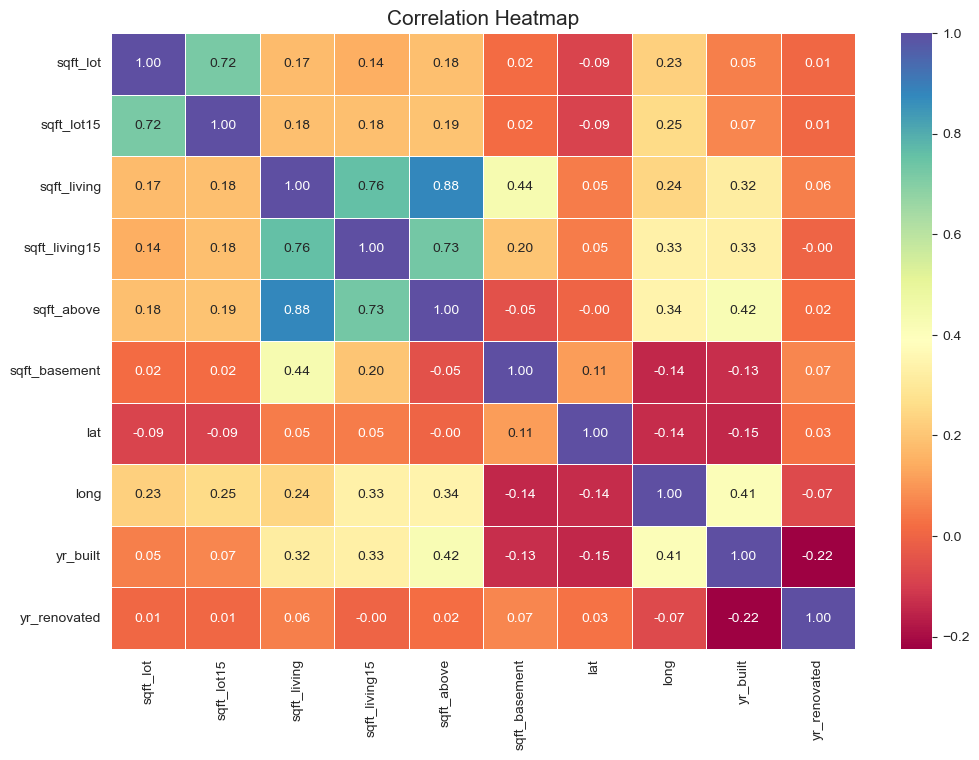

In [14]:
plt.figure(figsize=(12, 8))

# Create a heatmap
sns.heatmap(df[numeric_columns].corr(), annot=True, cmap='Spectral', linewidths=0.5,fmt=".2f")
plt.title('Correlation Heatmap', fontsize=15)
plt.show()

<h3 align="left"> <font color='coral'><i>Sqft_lot - Square footage of the land space</i></font></h3>

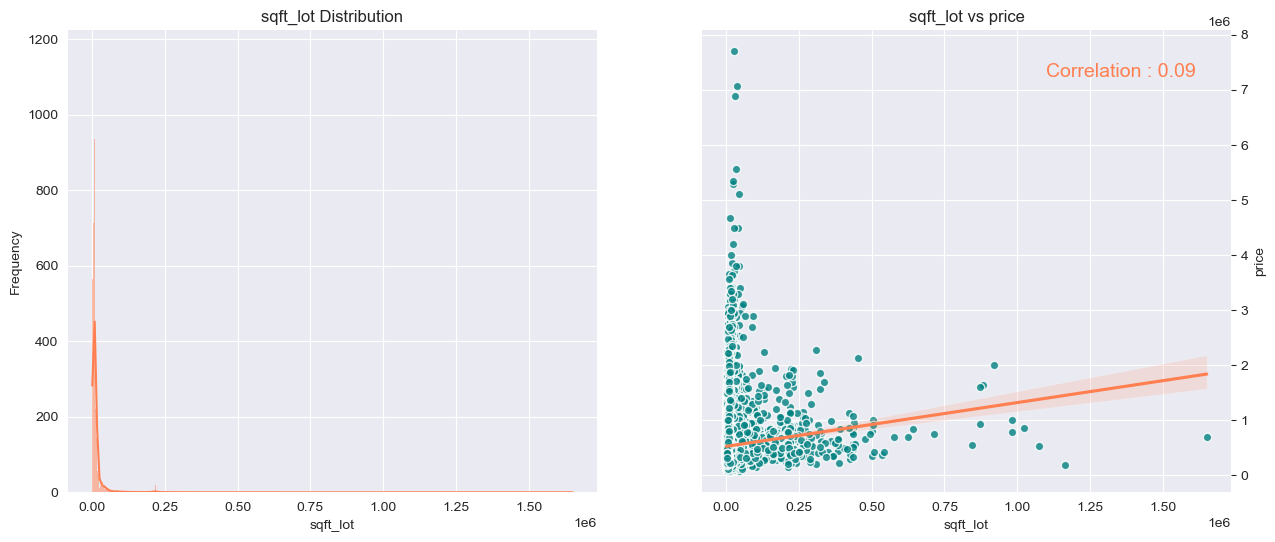

In [15]:
num_combined_plot(df,'sqft_lot','price')

<h3 align="left"> <font color='coral'><i>Sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors </i></font></h3>

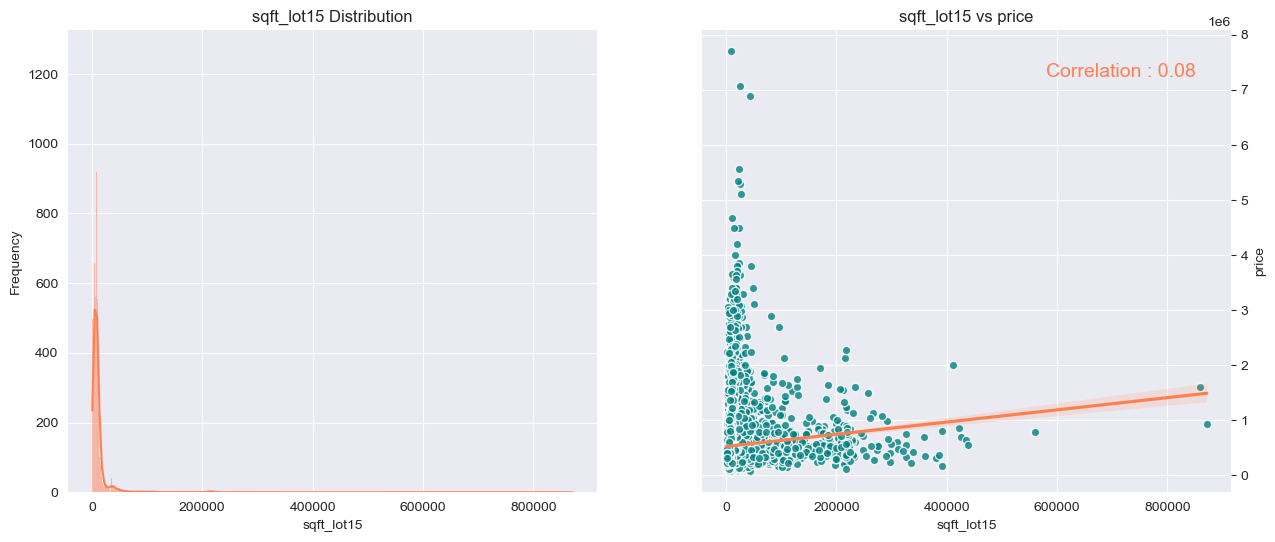

In [16]:
num_combined_plot(df,'sqft_lot15','price')

<div class="alert alert-block alert-info" style="margin-bottom: 20px;font-size: 16px;">
    <b>📊 Observation:- (sqft_lot and sqft_lot15)  </b>
    <ul>
        <li>Both 'Sqft_lot' and 'Sqft_lot15' exhibit similar patterns and trends in their behavior, implying a strong resemblance in their characteristics. </li>
        <li>The dataset encompasses a diverse spectrum of land space sizes, evident from the relatively high standard deviation. Notably, some land spaces greatly exceed the mean, contributing to this considerable variability.</li>
        <li>The correlation coefficients of (0.09, 0.08) between property prices and the square footage of the lot suggest a mild positive relationship. However, it's important to note that this relationship is not a robust predictor of property prices, as it lacks strong predictive power.</li>
    </ul>
</div>


<h3 align="left"> <font color='coral'><i>Sqft_living - Square footage of the apartments interior living space</i></font></h3>

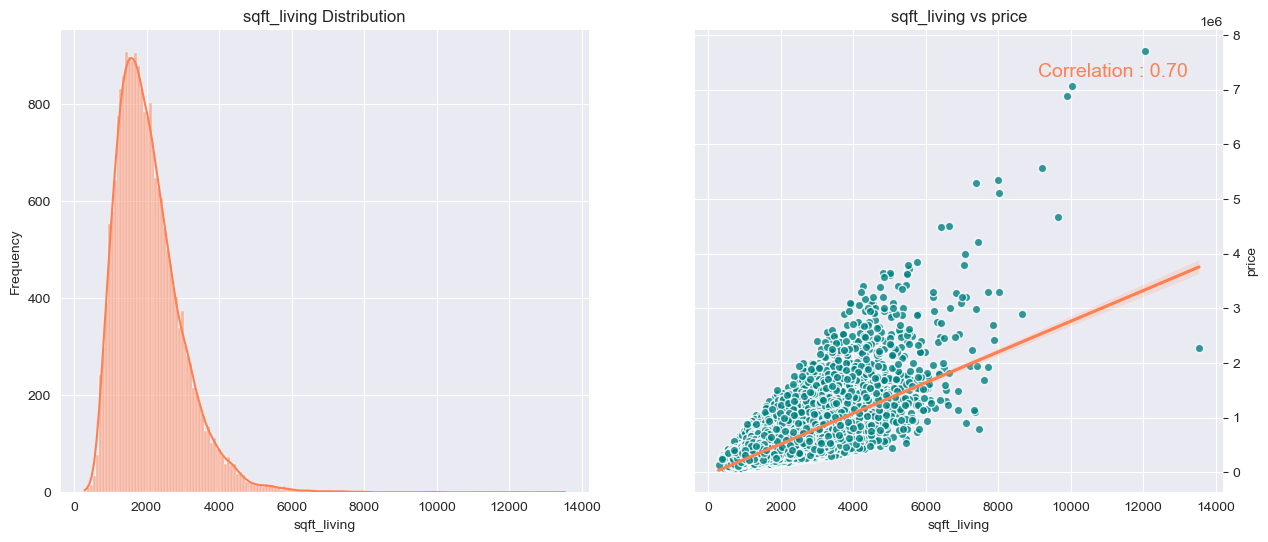

In [17]:
num_combined_plot(df,'sqft_living','price')

<h3 align="left"> <font color='coral'><i>Sqft_living 15 -  The square footage of interior housing living space for the nearest 15 neighbors</i></font></h3>

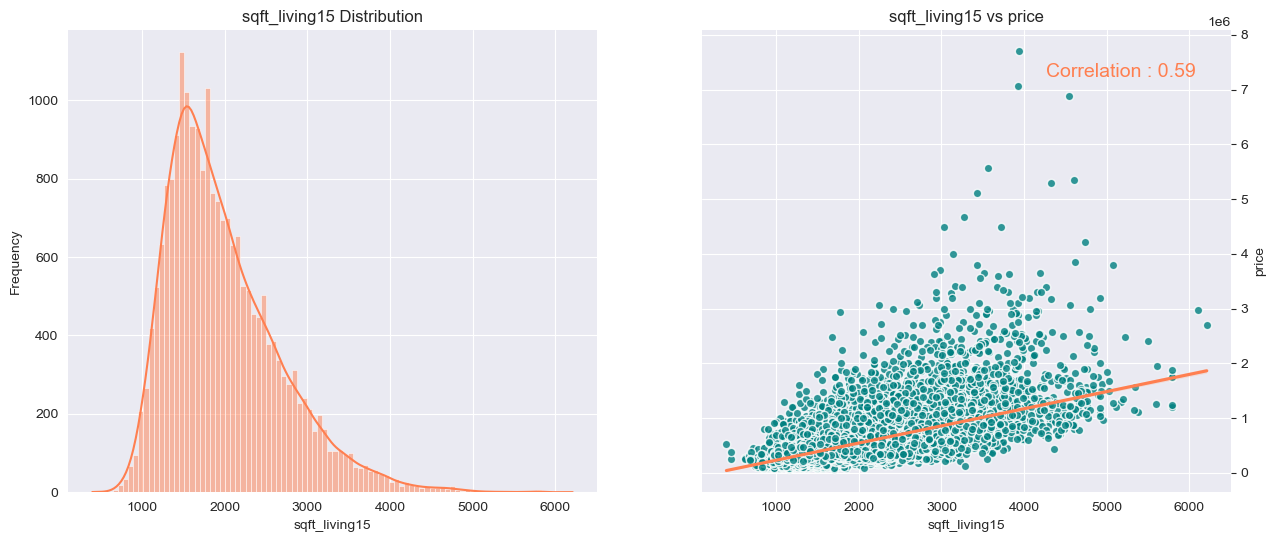

In [18]:
num_combined_plot(df,'sqft_living15','price')

<div class="alert alert-block alert-info" style="margin-bottom: 20px;font-size: 16px;">
    <b>📊 Observation:- (sqft_living and sqft_living15)  </b>
    <ul>
        <li>The typical living space size is approximately 2,079.9 square feet, serving as a common size among apartments in the dataset.</li>
        <li>A substantial standard deviation of around 918.4 square feet reveals notable variability in apartment sizes, with some significantly deviating from the mean.</li>
        <li>The presence of apartments with expansive living spaces, reaching a maximum of 13,540 square feet, hints at the inclusion of luxury or exceptionally spacious properties.</li>
        <li>A moderate positive correlation (0.7, 0.59) underscores that living space size significantly influences property prices. Generally, larger living spaces command higher market prices.</li>
    </ul>
</div>


<h3 align="left"> <font color='coral'><i>Sqft_above - The square footage of the interior housing space that is above ground level</i></font></h3>

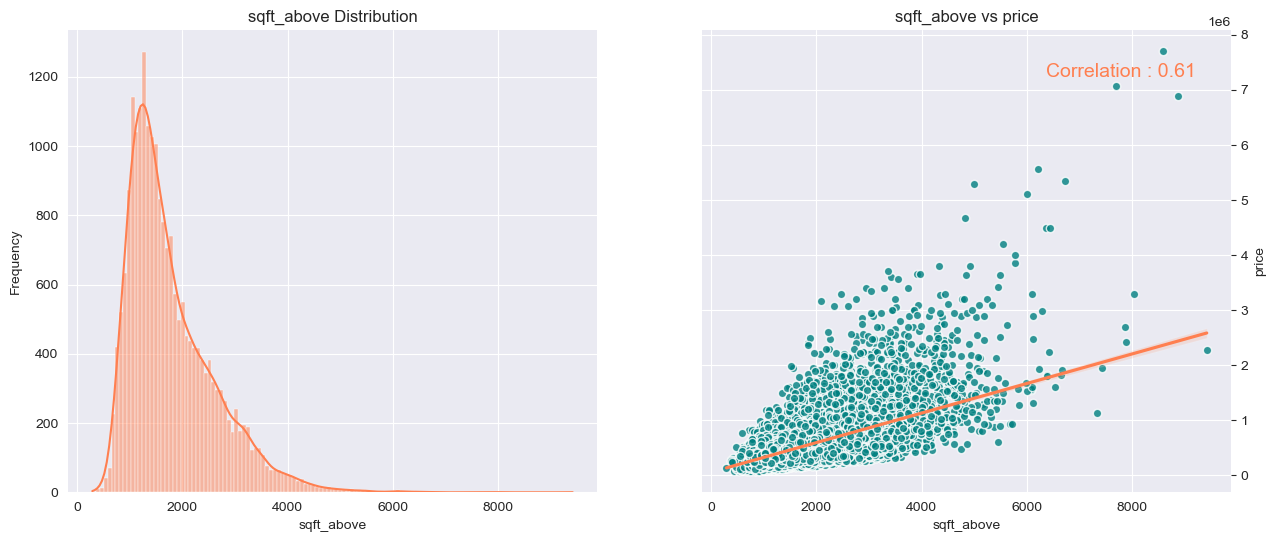

In [19]:
num_combined_plot(df,'sqft_above','price')

<div class="alert alert-block alert-info" style="margin-bottom: 20px;font-size: 16px;">
    <b>📊 Observation:  </b>
    <ul>
        <li>A correlation of 0.61 signifies a substantial positive relationship, highlighting the influential role of above-ground living space size in determining property prices. Larger properties often command higher valuations, while smaller ones tend to be more budget-friendly.</li>
    </ul>
</div>


<h3 align="left"> <font color='coral'><i>Sqft_basement - The square footage of the interior housing space that is below ground level</i></font></h3>

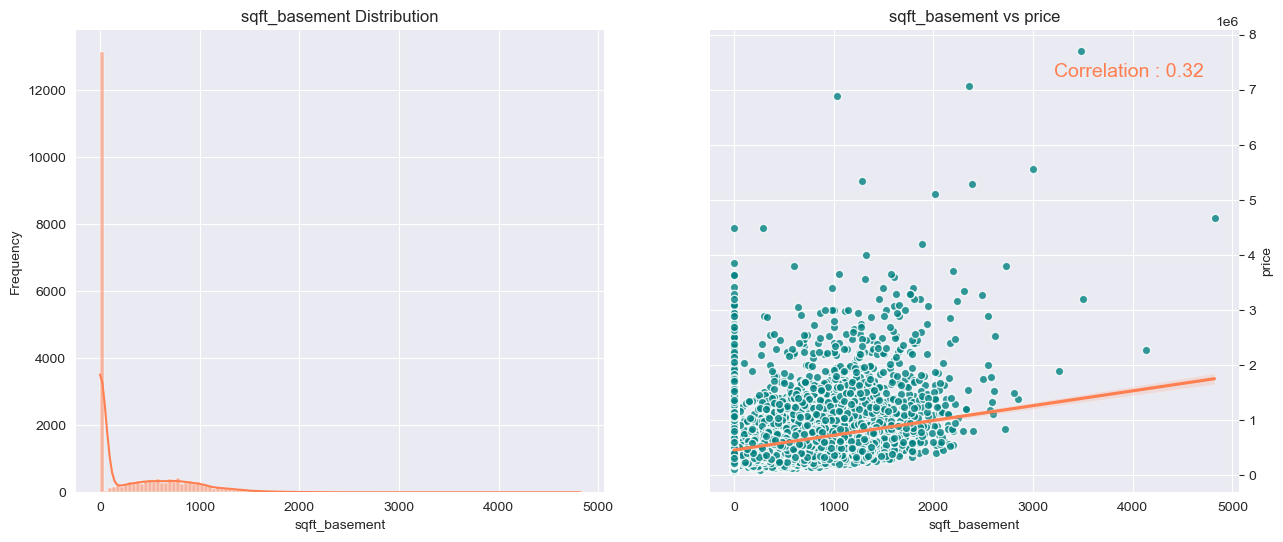

In [20]:
num_combined_plot(df,'sqft_basement','price')

<div class="alert alert-block alert-info" style="margin-bottom: 20px;font-size: 16px;">
    <b>📊 Observation:  </b>
    <ul>
        <li>The histogram distribution is distinctive due to the predominant absence of basements in most houses.</li>
        <li>The correlation (0.31) between basement area and price indicates a relatively weak relationship. Remarkably, within the 500-2000 basement area range, the dataset showcases substantial price variation, encompassing low, medium, and high-priced properties in the same area.</li>
    </ul>
</div>


<h3 align="left"> <font color='coral'><i>Price - Price of each home sold</i></font></h3>

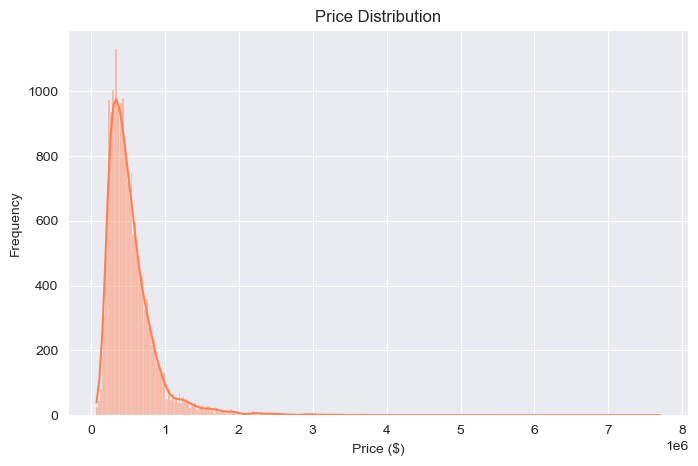

In [21]:
plt.figure(figsize=(8,5))
sns.histplot(data=df, x='price', kde=True, color='coral')
plt.xlabel('Price ($)')
plt.ylabel('Frequency') 
plt.title('Price Distribution')
plt.show()

<div class="alert alert-block alert-info" style="margin-bottom: 20px;font-size: 16px;">
    <b>📊 Observation:  </b>
    <ul>
        <li>A majority of house prices fall within the 0-1,500,000 range.</li>
        <li>The mean price for homes sold is around 540,088, reflecting the typical price in the dataset.</li>
        <li>The existence of high-priced properties, including the maximum at 7,700,000, may denote exceptional or unique real estate listings, potentially considered as outliers within the dataset.</li>
    </ul>
</div>


<h3 align="left"><font color='green'>Creating Function - Categoric Combined Plot</font></h3>

In [22]:
def create_subplot_grid(data, x, y):
    # Create subplots
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))

    # Plot the countplot with percentages
    sns.countplot(data=data, x=x, ax=axes[0], palette='Set2')
    axes[0].set(title=f'{x} Frequency')
    axes[0].tick_params(axis='x', rotation=90)
    axes[0].set_ylabel('Count (%)')
    
    # Calculate and annotate the percentages
    total = len(data)
    for p in axes[0].patches:
        percentage = '{:.1f}%'.format(100 * p.get_height() / total)
        x_ = p.get_x() + p.get_width() / 2
        y_ = p.get_height()
        axes[0].annotate(percentage, (x_, y_), ha='center', va='bottom')

    # Plot the boxplot
    sns.boxplot(data=data, x=x, y=y, ax=axes[1], palette='Set2')
    axes[1].set(title=f'Price vs. {x}')
    axes[1].tick_params(axis='x', rotation=90)

    # Plot the scatterplot with colors based on x
    sns.scatterplot(data=data, x=x, y=y, ax=axes[2], hue=x, palette='Set2')
    axes[2].set(title=f'{y} vs. {x}')
    axes[2].tick_params(axis='x', rotation=90)
    axes[2].yaxis.set_label_position("right")
    
    # Add the regression line to the scatterplot
    sns.regplot(data=data, x=x, y=y, ax=axes[2], color='coral', scatter=False)
    axes[2].get_legend().remove()

    plt.tight_layout()
    plt.show()

<h3 align="left"> <font color='coral'><i>Bedrooms - Number of bedrooms</i></font></h3>

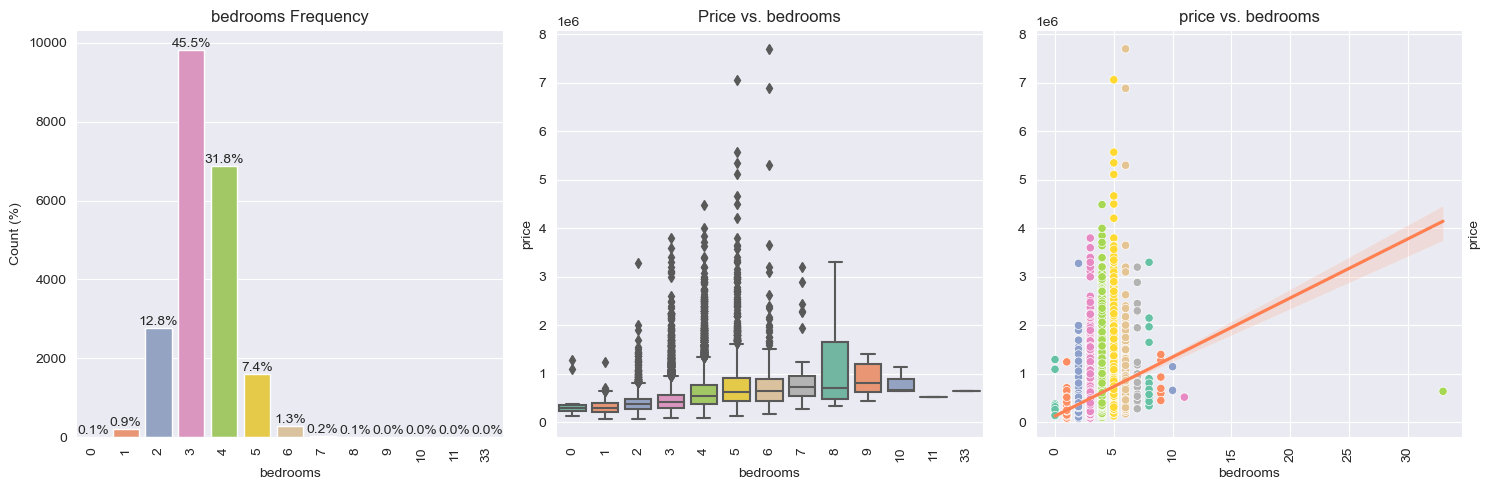

In [23]:
create_subplot_grid(df, 'bedrooms', 'price')

<div class="alert alert-block alert-info" style="margin-bottom: 20px;font-size: 16px;">
    <b>📊 Observation and  ⚙️Modeling Insights::  </b>
    <ul>
        <li>About half of the houses feature 3 bedrooms, while the remaining half is split between 4 bedrooms and 2 bedrooms. </li>
        <li>An observable trend is that prices tend to rise with an increasing number of bedrooms.</li>
        <li>Individual points in the plot represent outliers, typically indicating higher-priced houses. Notably, there is one outlier in the bedrooms variable, indicating a house with 33 bedrooms.</li>
        <li>A clear positive relationship is evident between the number of bedrooms and house prices, emphasizing that more bedrooms often lead to higher property prices.</li>
    </ul>
</div>


<h3 align="left"> <font color='coral'><i>Bathrooms - Number of Bathrooms</i></font></h3>

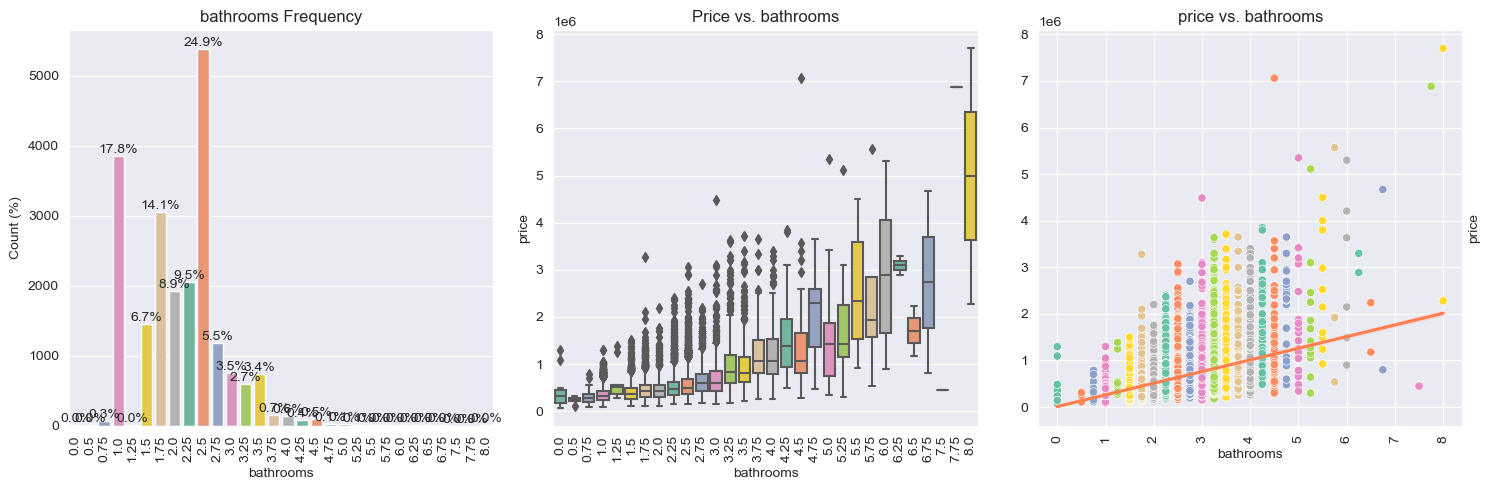

In [24]:
create_subplot_grid(df, 'bathrooms', 'price')

<div class="alert alert-block alert-info" style="margin-bottom: 20px;font-size: 16px;">
    <b>📊 Observation and  ⚙️Modeling Insights::  </b>
    <ul>
    <li>The majority of houses feature 1 to 4 bathrooms, generally associated with lower prices, while houses with more than 4 bathrooms tend to be more expensive. </li>
        <li>Anomalously, the summary includes fractional values for bathrooms, like 2.25, which are atypical since bathrooms are typically whole numbers (e.g., 1 or 2).</li>
        <li>A proportional relationship exists between the number of bathrooms and property prices. However, after 5 bathrooms, the sample size becomes too limited, making it challenging to draw definitive conclusions.</li>
    </ul>
</div>


<h3 align="left"> <font color='coral'><i>Floors - Number of floors</i></font></h3>

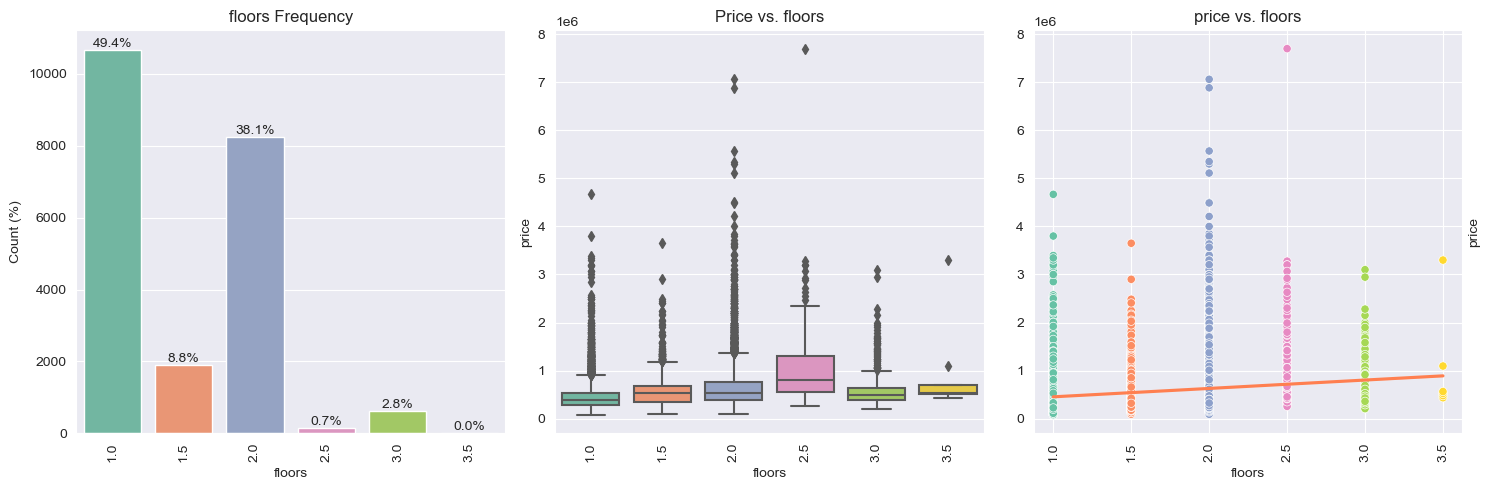

In [25]:
create_subplot_grid(df, 'floors', 'price')

<div class="alert alert-block alert-info" style="margin-bottom: 20px;font-size: 16px;">
    <b>📊 Observation and  ⚙️Modeling Insights::  </b>
    <ul>
        <li>Roughly half of the houses are single-story buildings, with the other half predominantly comprised of 2-story and 1.5-story structures. This suggests a substantial number of properties feature only a ground floor, with a few having penthouses as well.</li>
        <li>Notably, there isn't an evident correlation between the number of floors and property costs.</li>     
    </ul>
</div>


<h3 align="left"> <font color='coral'><i>Waterfront - A dummy variable for whether the apartment was overlooking the waterfront or not</i></font></h3>

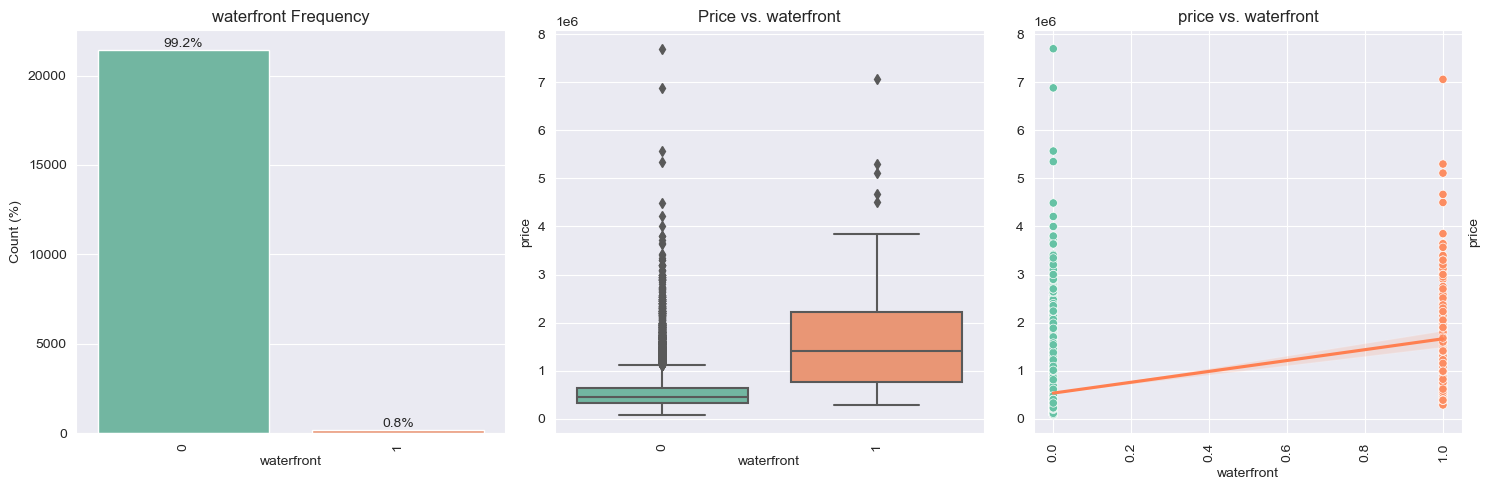

In [26]:
create_subplot_grid(df, 'waterfront', 'price')

<div class="alert alert-block alert-info" style="margin-bottom: 20px;font-size: 16px;">
    <b>📊 Observation and  ⚙️Modeling Insights::  </b>
    <ul>
        <li>The data reveals that roughly 1 in 10 houses boast waterfront access, while a significant majority lack this feature. </li>
        <li>Waterfront properties generally command higher price values, indicating their premium status.</li>
        <li>Waterfront homes exhibit a broader price range, whereas non-waterfront properties tend to have more consistent pricing.</li>
       <li>Houses with a view of the waterfront are notably more expensive than those without such a view, signifying the added value of scenic vistas.</li>
    </ul>
</div>


<h3 align="left"> <font color='coral'><i>View -An index from 0 to 4 of how good the view of the property</i></font></h3>

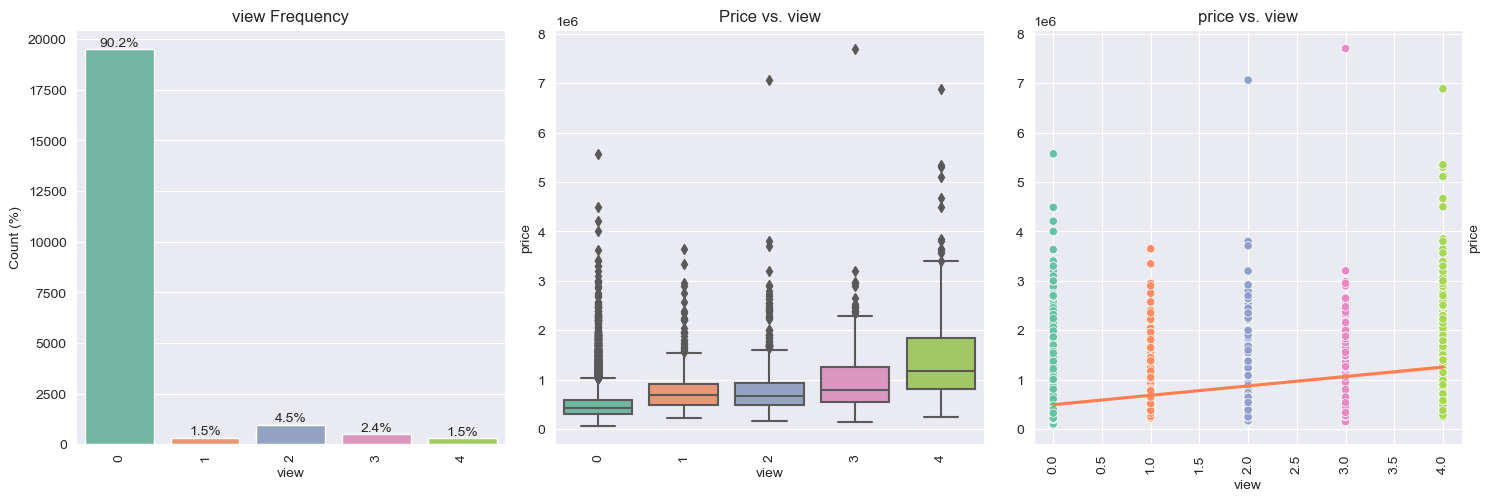

In [27]:
create_subplot_grid(df, 'view', 'price')

<div class="alert alert-block alert-info" style="margin-bottom: 20px;font-size: 16px;">
    <b>📊 Observation and  ⚙️Modeling Insights::  </b>
    <ul>
        <li>The 'View' rating ranges from 0 to 4, reflecting the quality of the property's view. The graph illustrates that most houses lack a substantial view, resulting in lower price ranges.</li>
        <li>Notably, there exists a positive correlation between the price of a house and its 'View' rating. Houses with a view rating of 4 tend to be particularly expensive, signifying the value attributed to exceptional views.</li>
    </ul>
</div>


<h3 align="left"> <font color='coral'><i>Condition - An index from 1 to 5 on the condition of the apartment</i></font></h3>

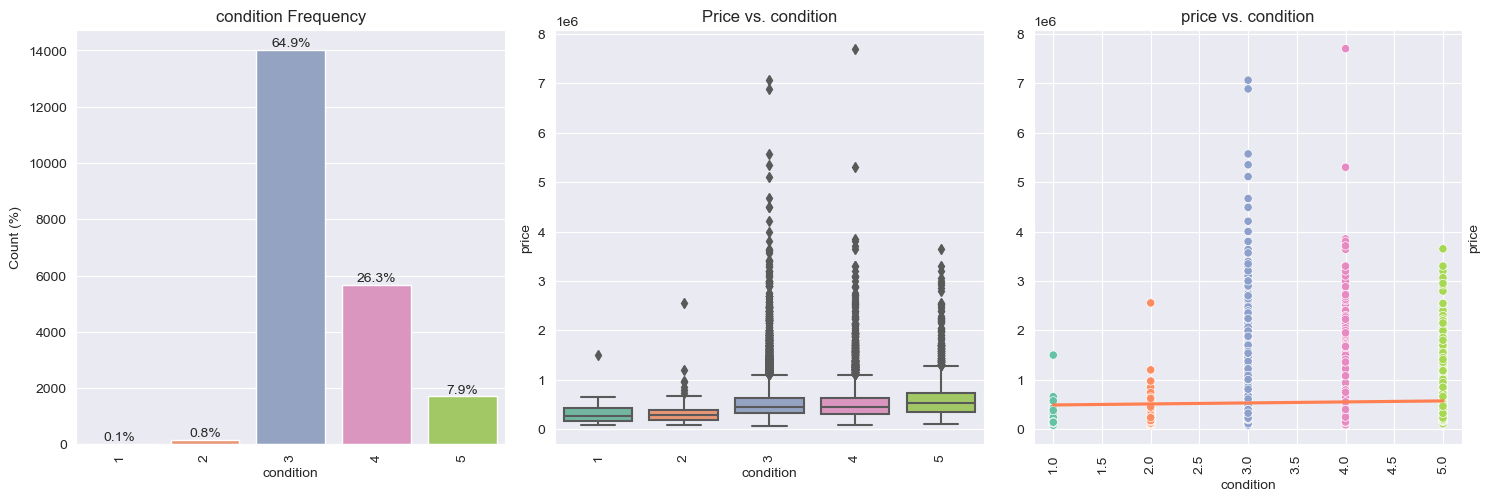

In [28]:
create_subplot_grid(df, 'condition', 'price')

<div class="alert alert-block alert-info" style="margin-bottom: 20px;font-size: 16px;">
    <b>📊 Observation and  ⚙️Modeling Insights::  </b>
    <ul>
        <li>The 'Condition' rating spans from 0 to 5, reflecting the building's condition. It's safe to say that a substantial portion of houses are in relatively good condition.</li>
        <li>There exists a weak relationship between the 'Condition' rating and property prices, suggesting that condition alone isn't a strong price determinant.</li>
        <li>An interesting avenue for exploration lies in examining the impact of low or high renovation rates on property values..</li>
    </ul>
</div>


<h3 align="left"> <font color='coral'><i>Grade -  An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design.</i></font></h3>

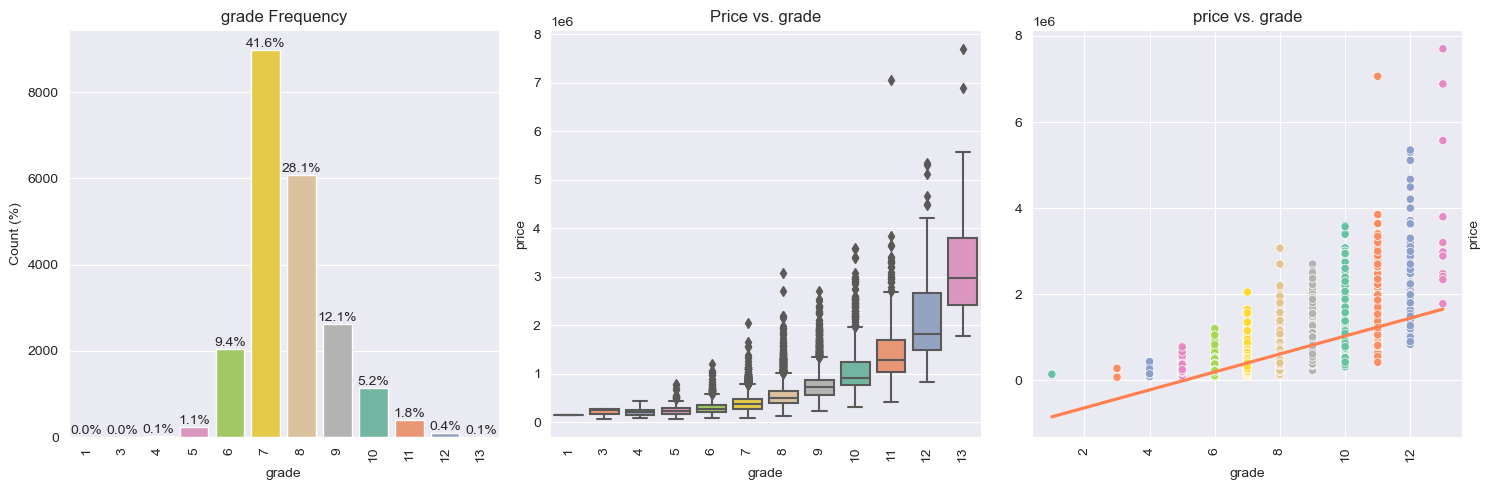

In [29]:
create_subplot_grid(df, 'grade', 'price')

<div class="alert alert-block alert-info" style="margin-bottom: 20px;font-size: 16px;">
    <b>📊 Observation and  ⚙️Modeling Insights::  </b>
    <ul>
        <li>The majority of houses exhibit average levels of construction and design quality. Notably, as the quality of construction and design improves, property prices tend to increase. </li>
           <li> This correlation aligns with the expectation that superior construction and design quality command higher prices in the real estate market.</li>
    </ul>
</div>


<h3 align="left"> <font color='coral'><i>Latitude - Location of House in terms of latitude</i></font></h3>

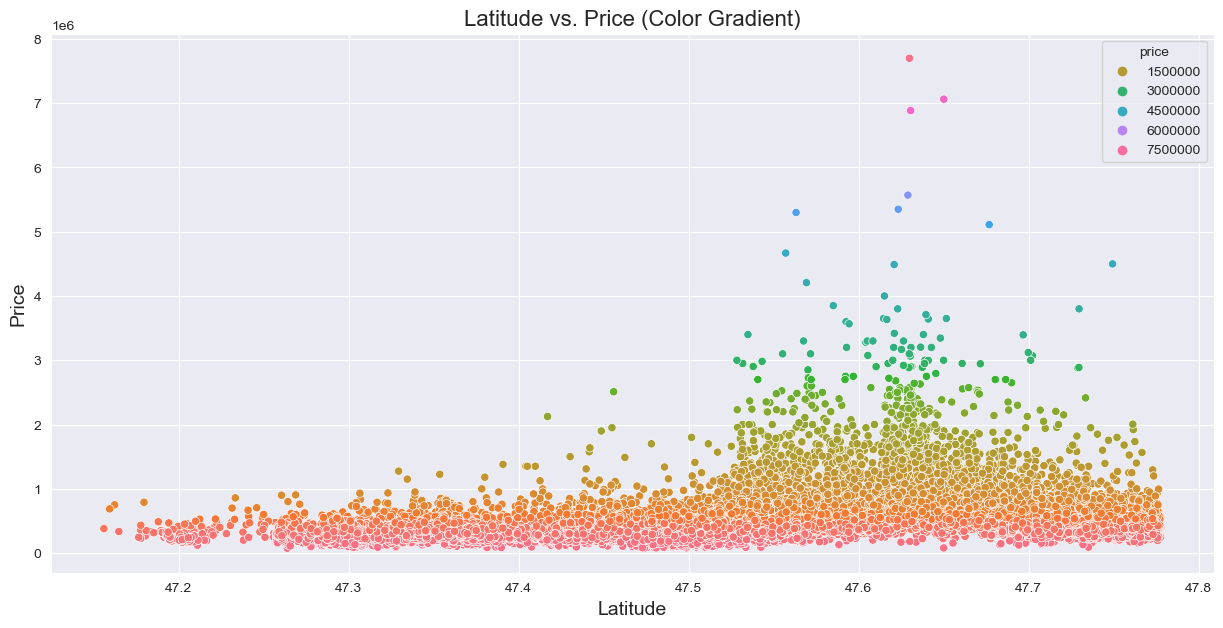

In [30]:
# Create the scatter plot with a color gradient for price
plt.figure(figsize=(15, 7))
sns.scatterplot(x='lat', y='price', data=df, hue='price', palette='husl')
plt.xlabel('Latitude', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.title('Latitude vs. Price (Color Gradient)', fontsize=16)
plt.show()

<div class="alert alert-block alert-info" style="margin-bottom: 20px;font-size: 16px;">
    <b>📊 Observation and  ⚙️Modeling Insights::  </b>
    <ul>
        <li> A concentration of high-priced houses is evident within the latitude range of 47.5-47.7. Simultaneously, this region experiences a notably high density of houses.</li> 
           <li> This observation suggests that this latitude range is a hotspot for both valuable real estate and a dense residential presence.  </li>
    </ul>
</div>


<h3 align="left"> <font color='coral'><i>Longitude - Location of House in terms of longitude</i></font></h3>

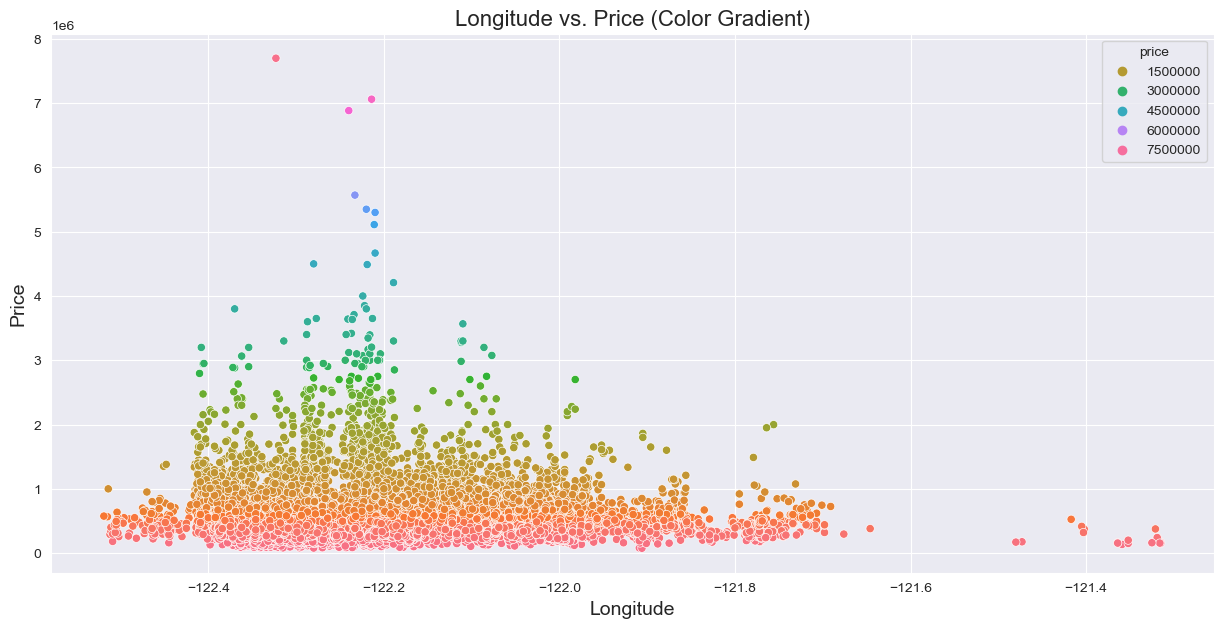

In [31]:
# Create the scatter plot with a color gradient for price
plt.figure(figsize=(15, 7))
sns.scatterplot(x='long', y='price', data=df, hue='price', palette='husl')
plt.xlabel('Longitude', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.title('Longitude vs. Price (Color Gradient)', fontsize=16)
plt.show()

<div class="alert alert-block alert-info" style="margin-bottom: 20px;font-size: 16px;">
    <b>📊 Observation and  ⚙️Modeling Insights::  </b>
    <ul>
        <li>Price differentiation based on longitude is generally indistinct. However, a discernible price distribution emerges at specific longitudes, particularly around -122.4 to -122.0.</li> 
            <li>This suggests that the area near longitude -122.4 to -122.0. is associated with more expensive housing, with a distinct price distribution.</li>
    </ul>
</div>


<h3 align="left"> <font color='coral'><i>Yr_built - The year the house was initially built</i></font></h3>

Text(0, 0.5, 'price')

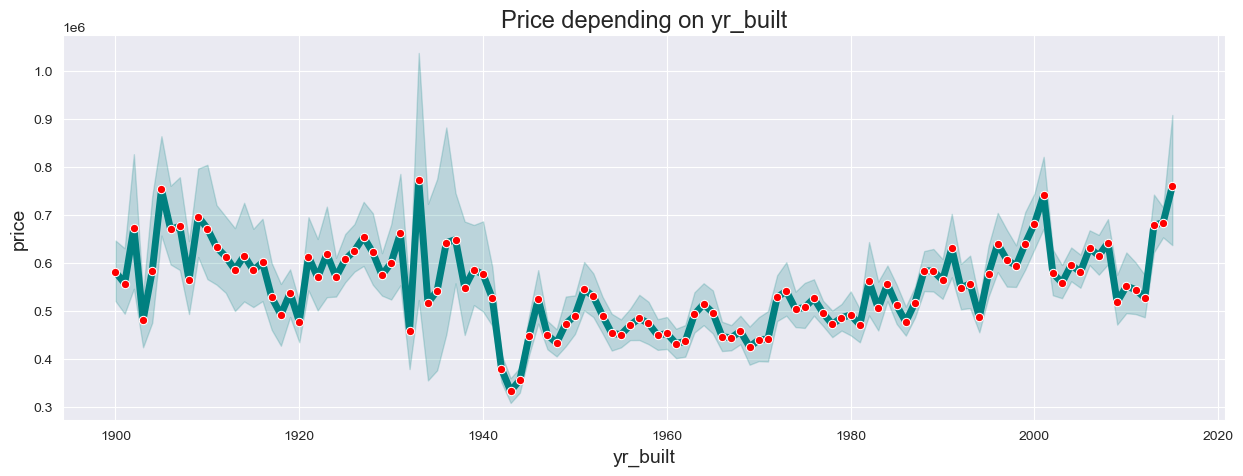

In [32]:
plt.figure(figsize=(15, 5))
sns.lineplot(x='yr_built', y='price', data=df, color='teal', lw=5, marker='o', markerfacecolor='red')
plt.title('Price depending on yr_built', fontsize=17)
plt.xlabel('yr_built', fontsize=14)
plt.ylabel('price', fontsize=14)

<div class="alert alert-block alert-info" style="margin-bottom: 20px;font-size: 16px;">
    <b>📊 Observation and  ⚙️Modeling Insights::  </b>
    <ul>
        <li>The lowest cost is associated with houses constructed during the Second World War. Conversely, the highest prices are observed for houses built in 1905, 1934, 2001, and 2014.</li>
    </ul>
</div>


<h3 align="left"> <font color='coral'><i>Yr_renovated - The year of the house’s last renovation</i></font></h3>

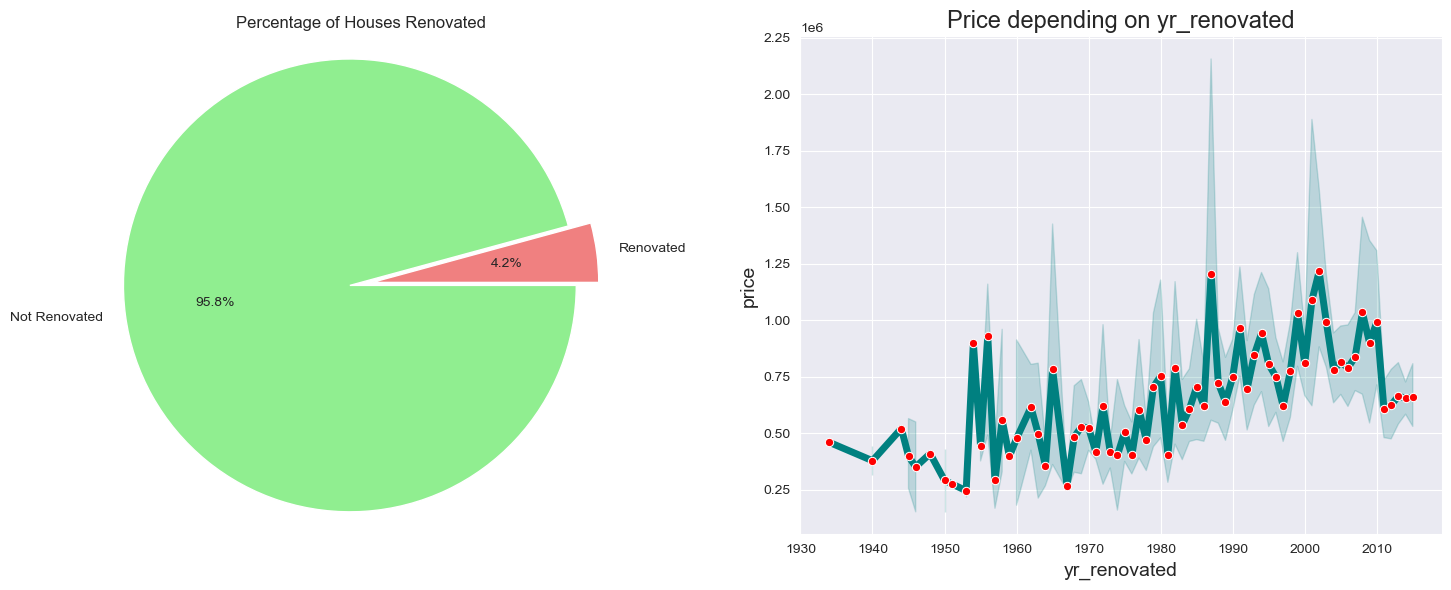

In [33]:
# Count the number of houses that have been renovated (non-zero 'yr_renovated').
renovated_count = len(df[df['yr_renovated'] != 0])

# Calculate the total number of houses.
total_houses = len(df)

# Calculate the percentage of houses that have been renovated.
percentage_renovated = (renovated_count / total_houses) * 100

# Create a pie chart.
labels = ['Renovated', 'Not Renovated']
sizes = [percentage_renovated, 100 - percentage_renovated]
explode = (0.1, 0)  

plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=0, explode=explode, colors=['lightcoral', 'lightgreen'])
plt.title('Percentage of Houses Renovated')
plt.axis('equal')

# Create the line plot showing the relationship between price and the year of renovation.
plt.subplot(1, 2, 2)
sns.lineplot(x='yr_renovated', y='price', data=df[df['yr_renovated'] != 0], color='teal', lw=5, marker='o', markerfacecolor='red')
plt.title('Price depending on yr_renovated', fontsize=17)
plt.xlabel('yr_renovated', fontsize=14)
plt.ylabel('price', fontsize=14)

plt.tight_layout()

plt.show()

<div class="alert alert-block alert-info" style="margin-bottom: 20px;font-size: 16px;">
    <b>📊 Observation and  ⚙️Modeling Insights::  </b>
    <ul>
        <li>The overall decent condition of houses explains why only a small fraction, specifically 4.2%, undergo renovation.</li>
        <li>Notably, from 1970 onwards, there's a noticeable upward trend in renovation prices.</li>
    </ul>
</div>


<h2 align="left"><font color='FF8C00'><u>Multivariate Analysis</u></font></h2>

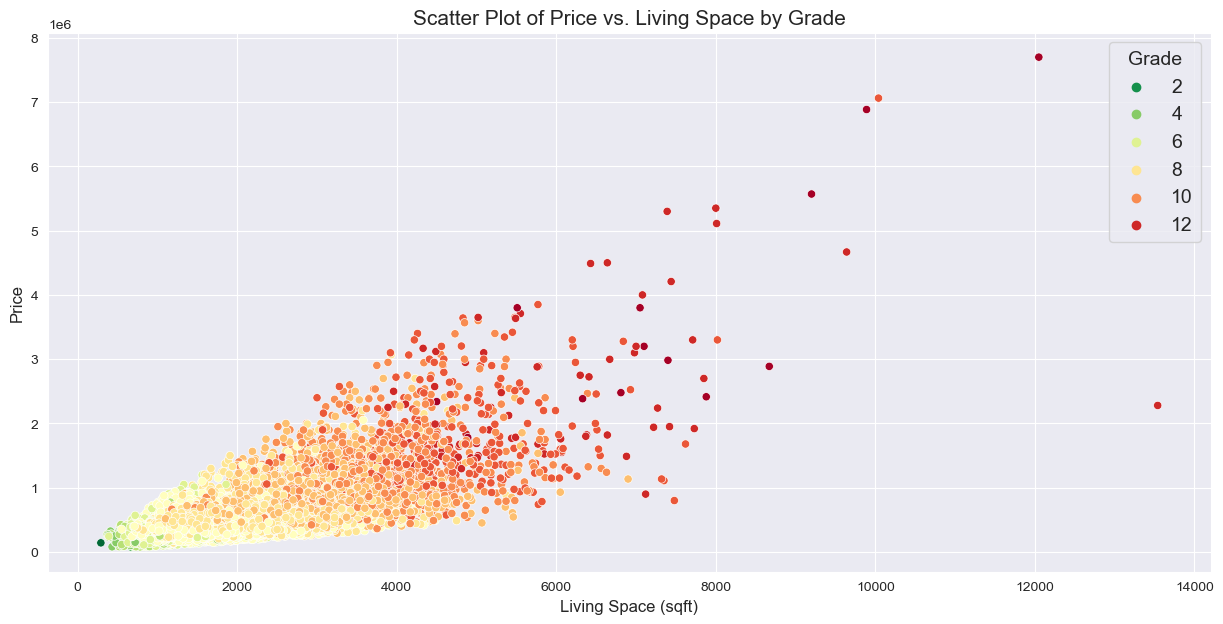

In [34]:
plt.figure(figsize=(15, 7))
sns.scatterplot(data=df, x='sqft_living', y='price', hue='grade', palette='RdYlGn_r')
plt.xlabel('Living Space (sqft)', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.title('Scatter Plot of Price vs. Living Space by Grade', fontsize=15)
plt.legend(title='Grade', fontsize=14, title_fontsize=14)
plt.show()

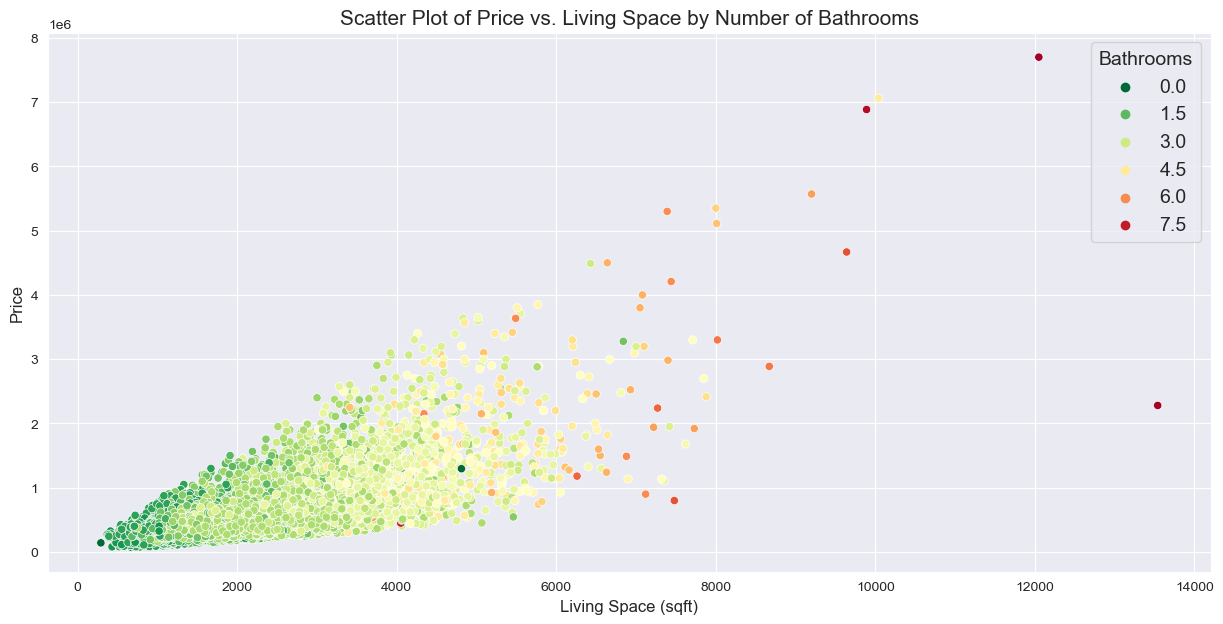

In [35]:
plt.figure(figsize=(15, 7))
sns.scatterplot(data=df, x='sqft_living', y='price', hue='bathrooms', palette='RdYlGn_r')
plt.xlabel('Living Space (sqft)', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.title('Scatter Plot of Price vs. Living Space by Number of Bathrooms', fontsize=15)
plt.legend(title='Bathrooms', fontsize=14, title_fontsize=14)
plt.show()

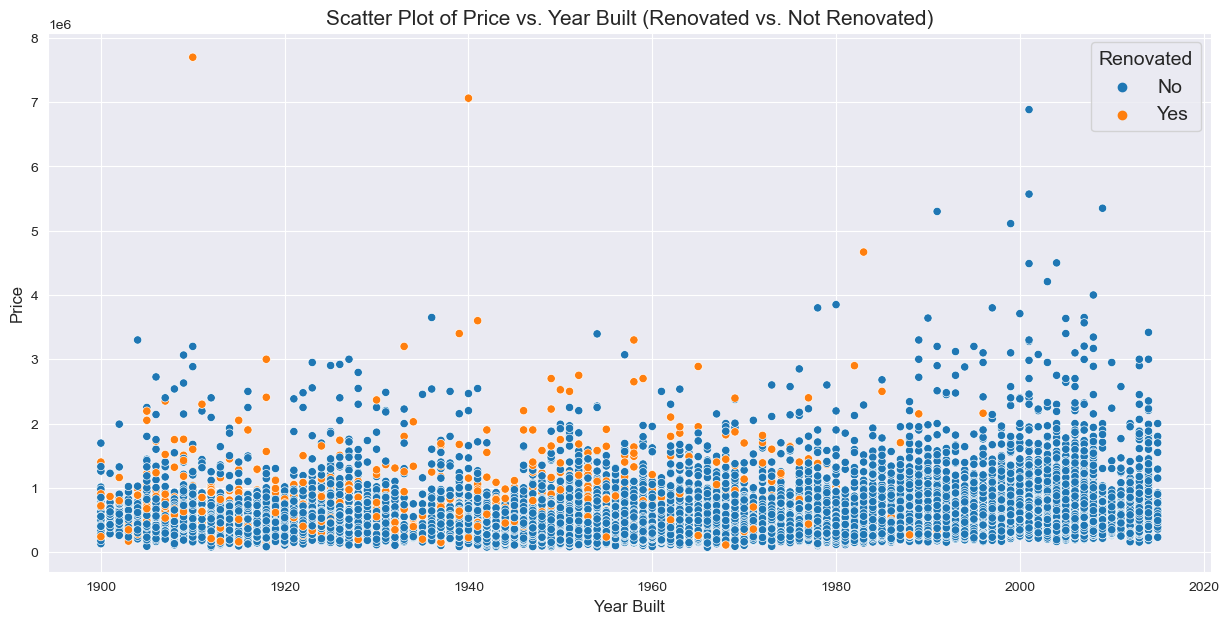

In [36]:
plt.figure(figsize=(15, 7))
sns.scatterplot(data=df, x='yr_built', y='price', hue=df['yr_renovated'].apply(lambda x: 'Yes' if x > 0 else 'No'))
plt.xlabel('Year Built', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.title('Scatter Plot of Price vs. Year Built (Renovated vs. Not Renovated)', fontsize=15)
plt.legend(title='Renovated', fontsize=14, title_fontsize=14)
plt.show()

<div class="alert alert-block alert-info" style="margin-bottom: 20px;font-size: 16px;">
    <b>📊 Combined Observation and Insights Multi-Variate Analysis:  </b>
    <ul>
        <li>Higher-grade properties (probably indicating better quality) tend to have larger living spaces and higher prices. There is a positive correlation between living space size and price, and this correlation is influenced by the property's grade.</li>
        <li>Properties with more bathrooms tend to have larger living spaces and higher prices. The color differentiation by the number of bathrooms allows for a clearer understanding of how different bathroom counts affect the relationship between living space and price.</li>
        <li>The majority of the renovated houses date back to the period between the 1900s and the 1980s.</li>
    </ul>
</div>


<div style="color:white;
           display:fill;
           border-radius:20px;
           background-color:#FFA500;
           font-size:200%;
           font-family:Verdana;
           letter-spacing:1px">
<a class="anchor" id="CH-4"></a> 
<p style="padding: 10px;
              color:white;">
              4. Feature Engineering 🛠️
</p>
</div>

<h2 align="left"><font color='FF8C00'><u>Train-Test Split</u> Executing Initially To Prevent Data Leakage</font></h2>

In [37]:
# Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df.iloc[:,1:19],df.iloc[:,0],test_size=0.3, random_state=0)

# Converting y_train, y_test back to DataFrame
y_train = pd.DataFrame(y_train)
y_test = pd.DataFrame(y_test)

X_train.shape,y_train.shape,X_test.shape,y_test.shape

((15129, 18), (15129, 1), (6484, 18), (6484, 1))

<div class="alert alert-block alert-warning" style="margin-bottom: 20px; font-size: 16px;">
    <b>⚙️ Modeling Insights: </b>
    <ul>
        <li>By splitting the data first, to ensure that feature engineering is based solely on the training data, to avoid data leakage and making the model evaluation more reliable and realistic.</li>
    </ul>
</div>

<h2 align="left"><font color='FF8C00'><u>1. Outlier Detection and Treatment</u></font></h2>

<h3 align="left"><font color='green'>Creating Function - Box Plot</font></h3>

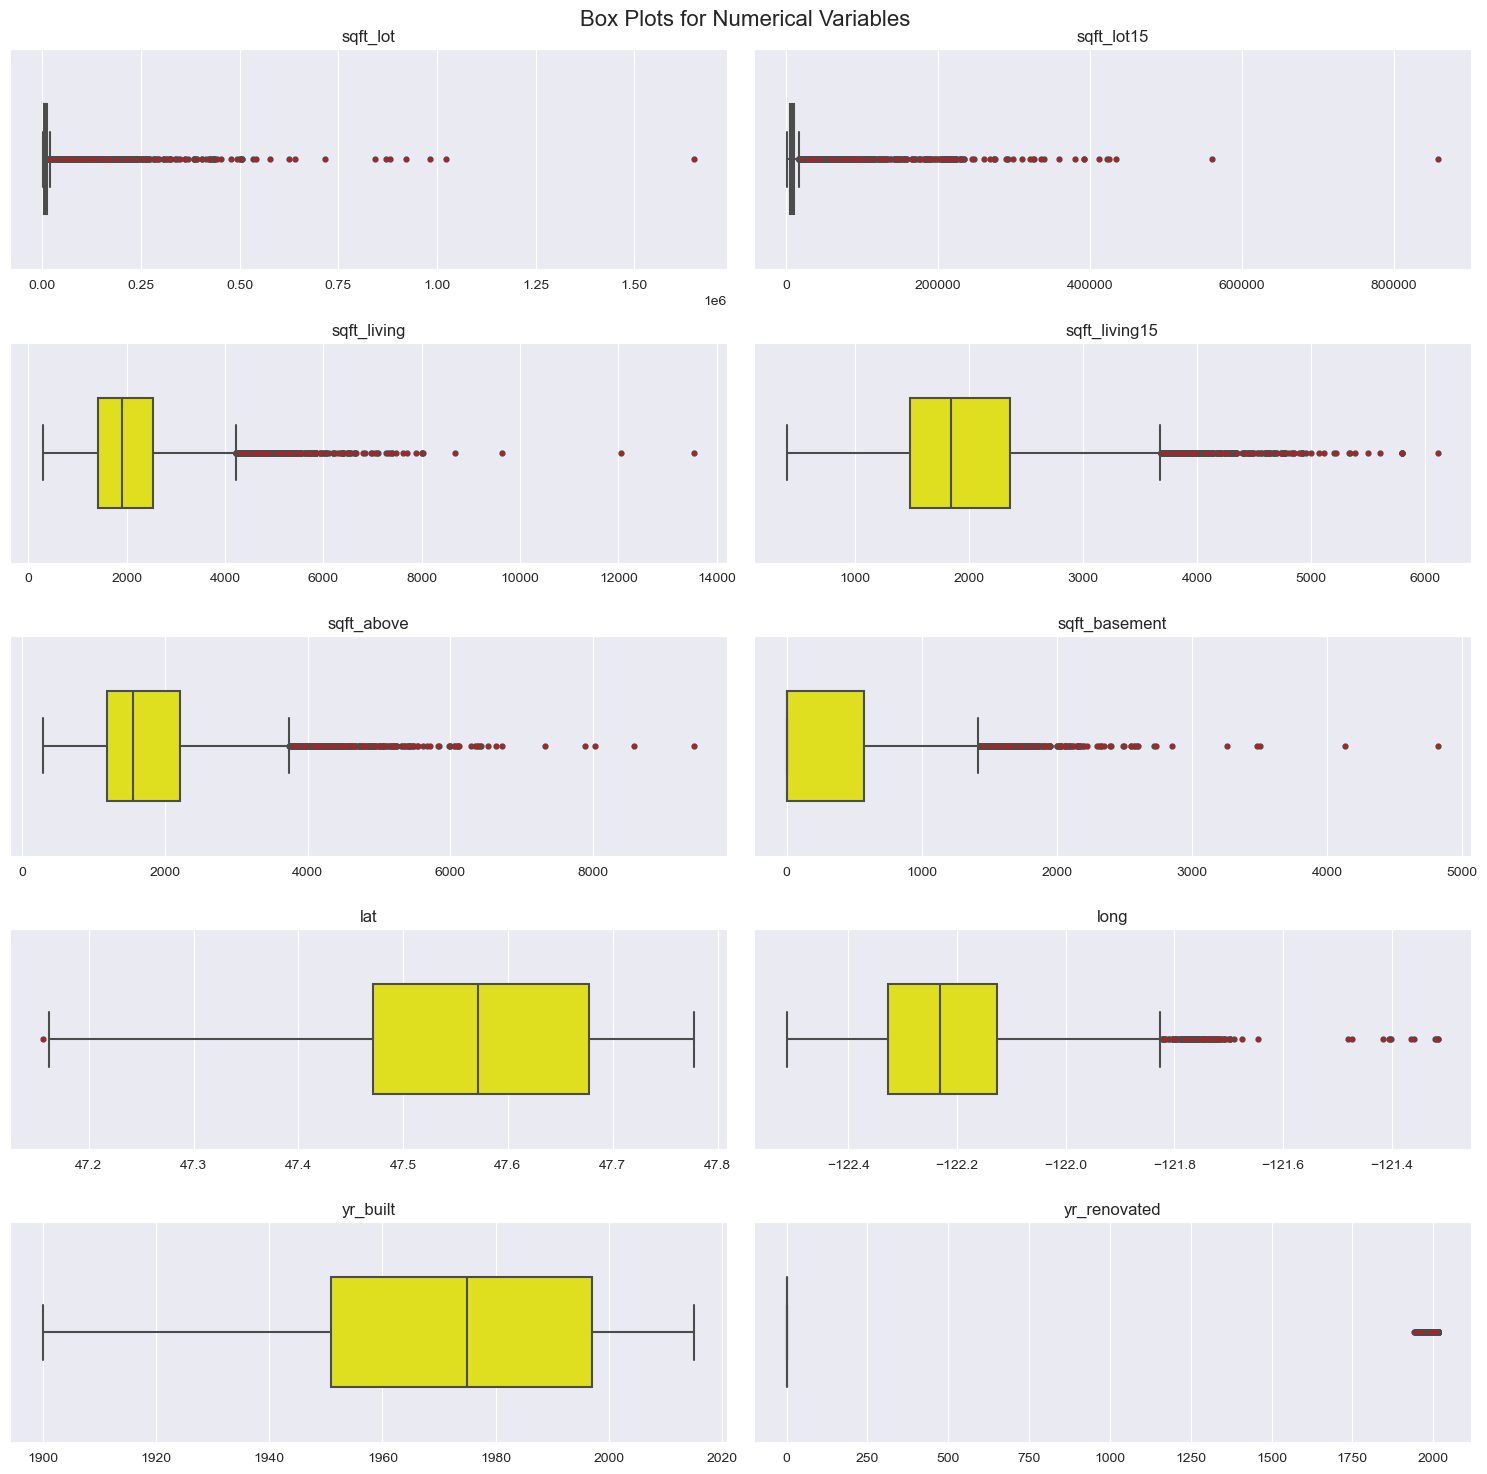

In [38]:
fig,axes = plt.subplots(5,2,figsize=(15,15))

def plot_two(feat,i,j):
    sns.boxplot(x=X_train[feat],color='yellow', width=0.5, flierprops={'marker': 'o', 'markerfacecolor': 'red', 'markersize': 3.5}, ax=axes[i,j])
    axes[i, j].set_title(feat)
    axes[i, j].set_xlabel('')

for i,feat in enumerate(numeric_columns):
    j = i%2 #0 or 1
    plot_two(feat,i//2,j)
    warnings.filterwarnings("ignore", category=UserWarning)

fig.suptitle('Box Plots for Numerical Variables', fontsize=16)
plt.tight_layout()
plt.show()

In [39]:
# During EDA It was observed Categoric Feature - Bedroom had outlier
X_train['bedrooms'] = np.where(X_train['bedrooms'] > 11, 11, X_train['bedrooms'])
X_test['bedrooms'] = np.where(X_test['bedrooms'] > 11, 11, X_test['bedrooms'])

<div class="alert alert-block alert-warning" style="margin-bottom: 20px; font-size: 16px;">
    <b>⚙️ Modeling Insights: </b>
    <ul>
        <li>Numerous features in the dataset exhibit a notable presence of outliers. Eliminating these outliers could result in a significant loss of valuable information. Various techniques, including Z-score, standard deviation, IQR, and percentile capping, were explored, but none proved effective for this dataset.</li> 
            <li>Consequently, the next iteration of this kernel will experiment with outlier detection using clustering methods. For now, we will proceed with feature transformation to work with the existing data.</li>
    </ul>
</div>

<h2 align="left"><font color='FF8C00'><u>2. Feature Transformation </u></font></h2>

<h3 align="left"><font color='green'>Creating Function - Log_Transformation</font></h3>

In [40]:
def log_transformation(data,column):
    plt.figure(figsize=(22,6))

    plt.subplot(141)
    sns.histplot(data[column],kde=True,color='red');

    plt.subplot(142)
    stats.probplot(data[column], dist="norm", plot=pylab) ;

    plt.subplot(143)
    sns.histplot(np.log(data[column]),color="green",kde=True);

    plt.subplot(144)
    stats.probplot(np.log(data[column]), dist="norm", plot=pylab) ;
    
    data[column] = np.log(data[column])

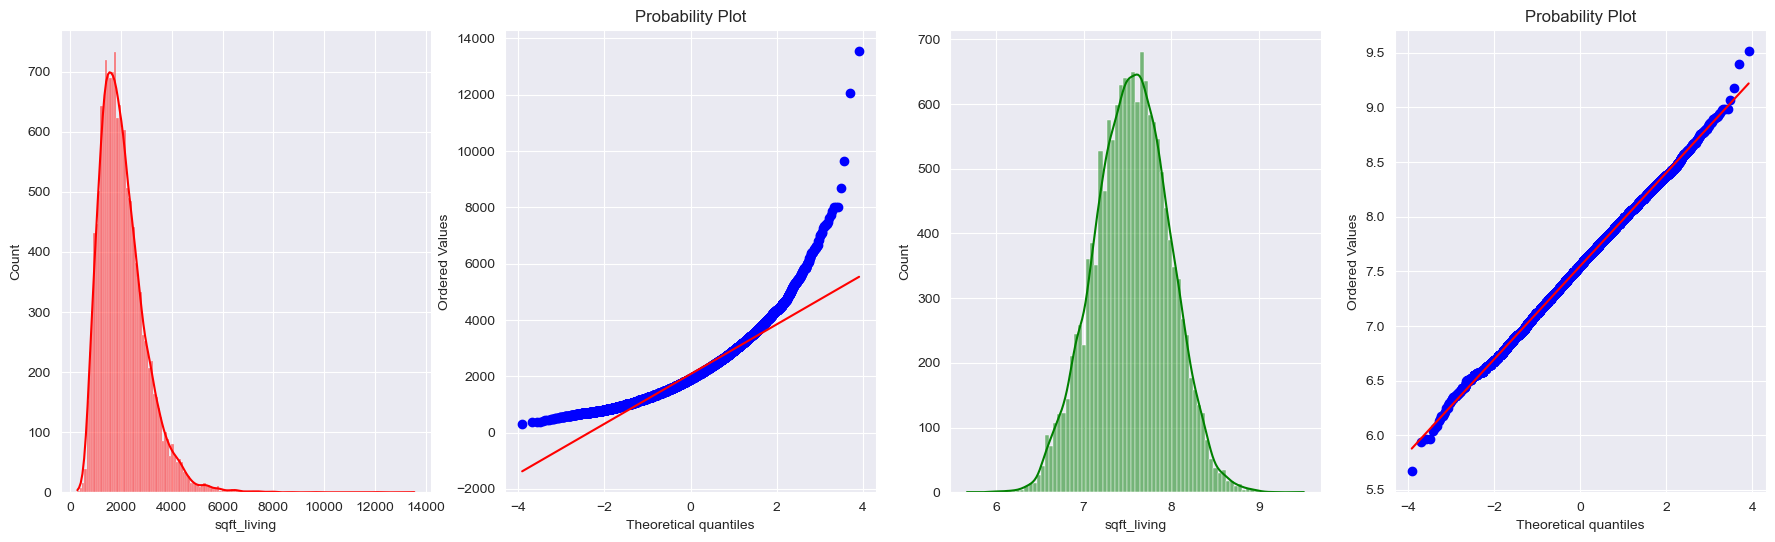

In [41]:
log_transformation(X_train,'sqft_living')

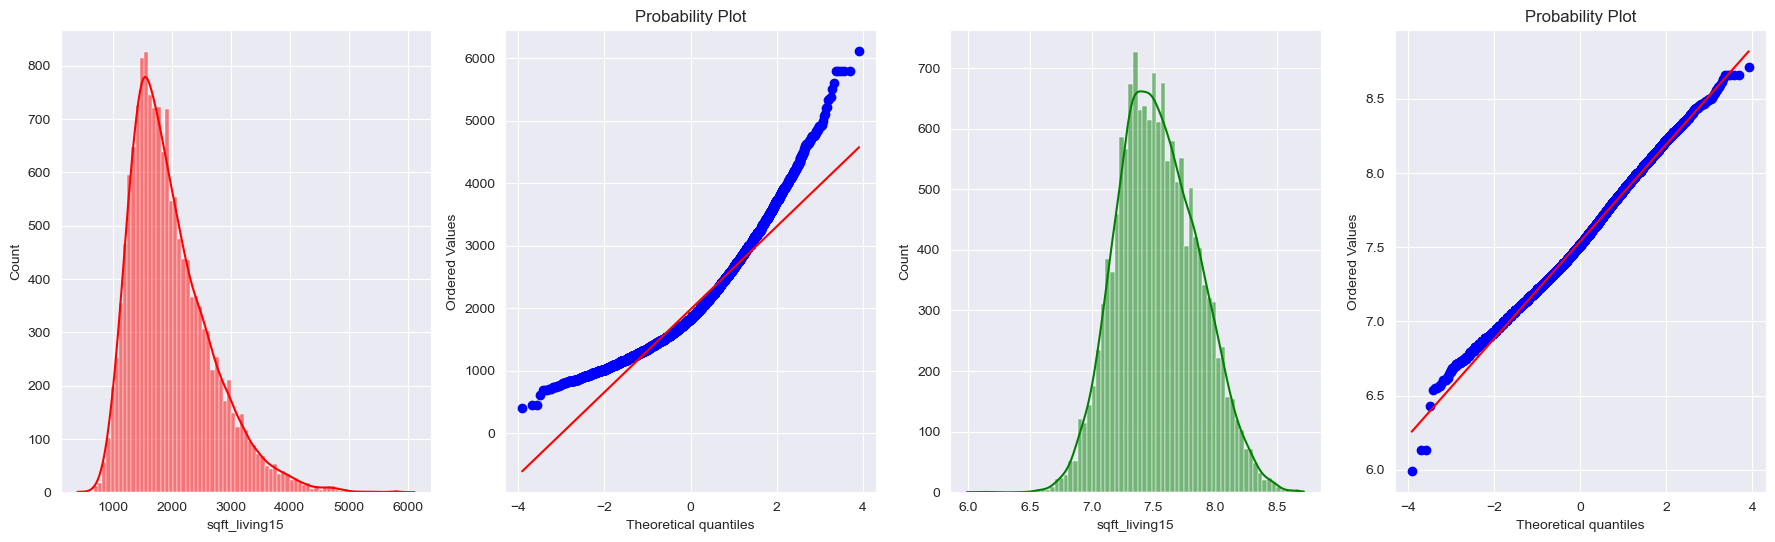

In [42]:
log_transformation(X_train,'sqft_living15')

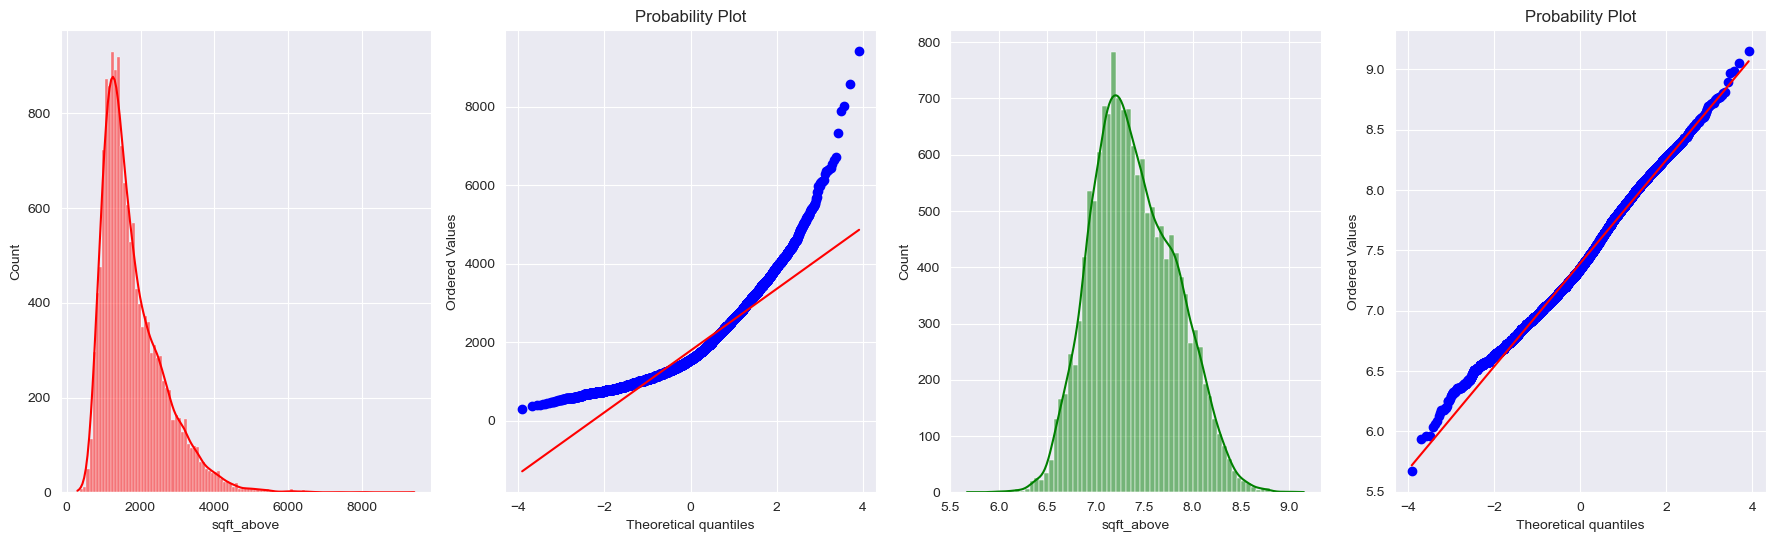

In [43]:
log_transformation(X_train,'sqft_above')

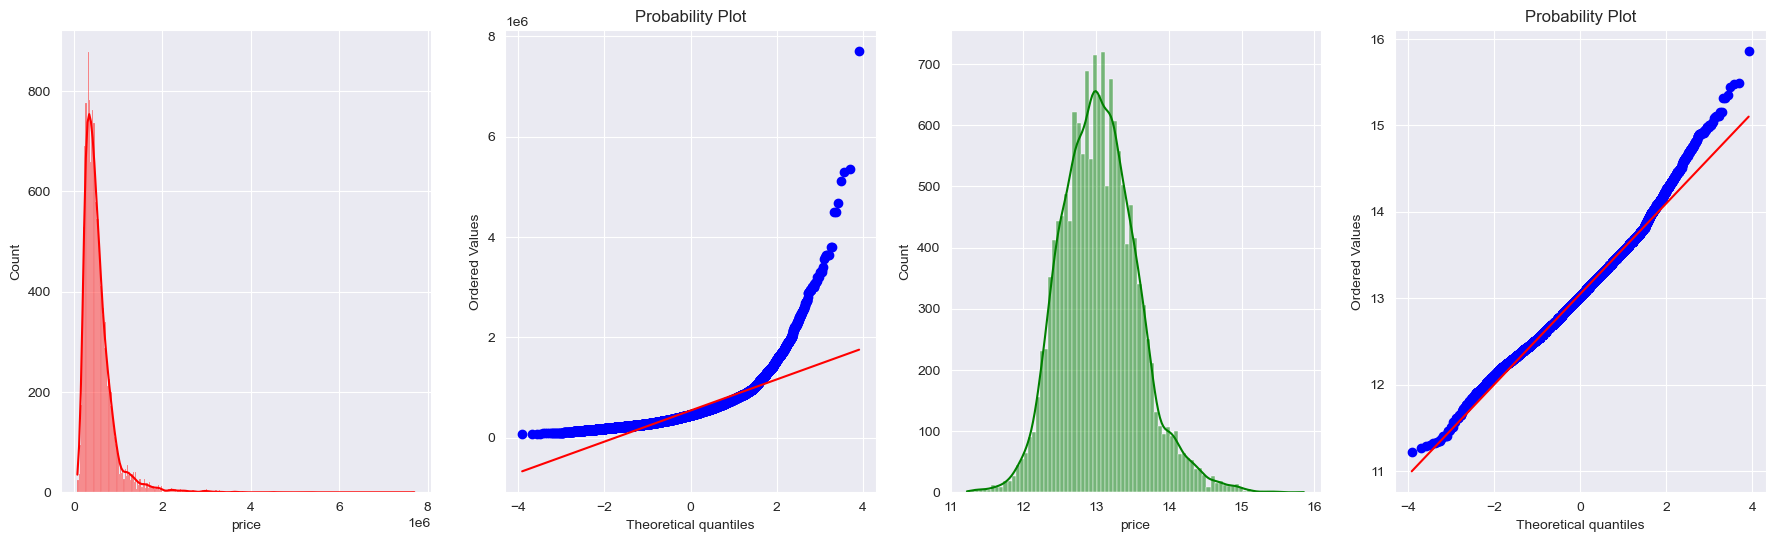

In [44]:
log_transformation(y_train,'price')

In [45]:
# Independent Variable
X_test['sqft_living'] = np.log(X_test['sqft_living'])
X_test['sqft_living15'] = np.log(X_test['sqft_living15'])
X_test['sqft_above'] = np.log(X_test['sqft_above'])

# Dependent Variabel
y_test['price'] = np.log(y_test['price'])

<h3 align="left"><font color='green'>Creating Function - Box-Cox_Transformation</font></h3>

In [46]:
def box_cox_transformation(data,column):
    plt.figure(figsize=(22,6))

    plt.subplot(141)
    sns.histplot(data[column],kde=True,color='red');

    plt.subplot(142)
    stats.probplot(data[column], dist="norm", plot=pylab) ;
    
    from sklearn.preprocessing import PowerTransformer 
    boxcox = PowerTransformer(method='box-cox') 
    data[column] = boxcox.fit_transform(data[[column]])

    plt.subplot(143)
    sns.histplot(data[column],color="green",kde=True);

    plt.subplot(144)
    stats.probplot(data[column], dist="norm", plot=pylab) ;

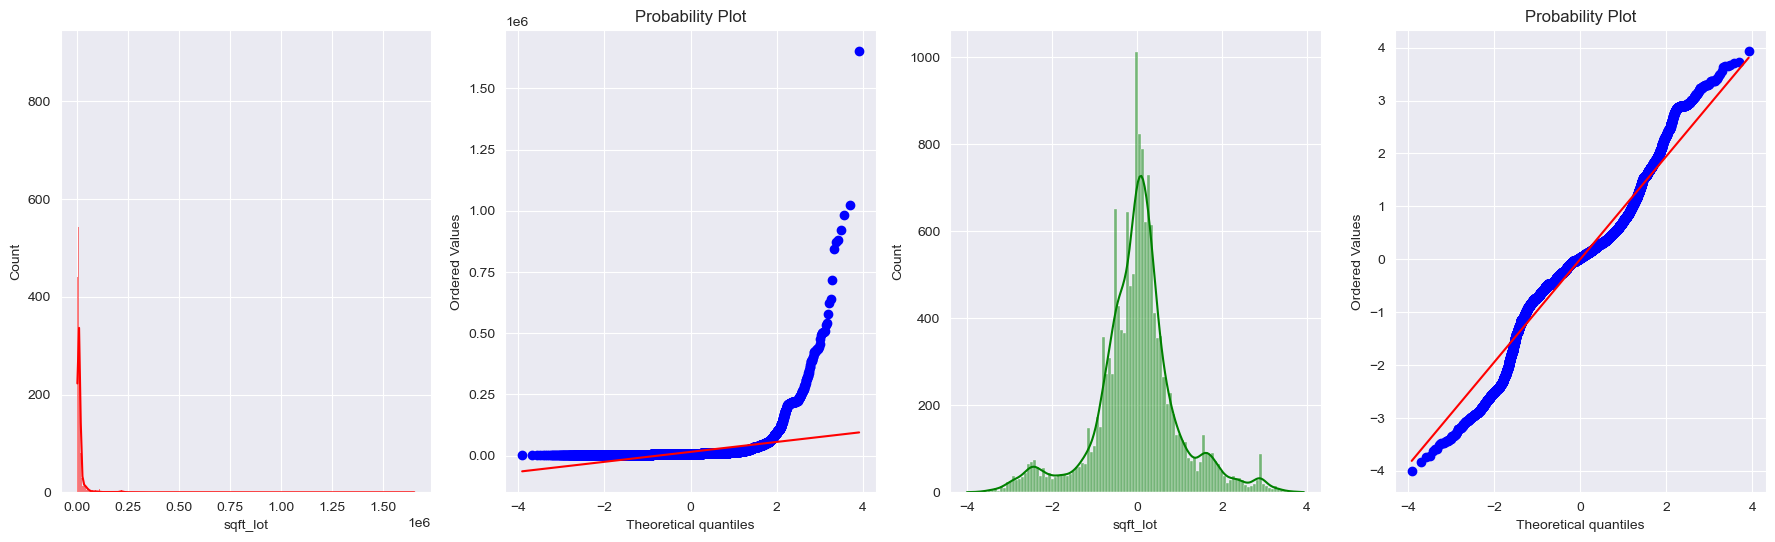

In [47]:
box_cox_transformation(X_train,'sqft_lot')

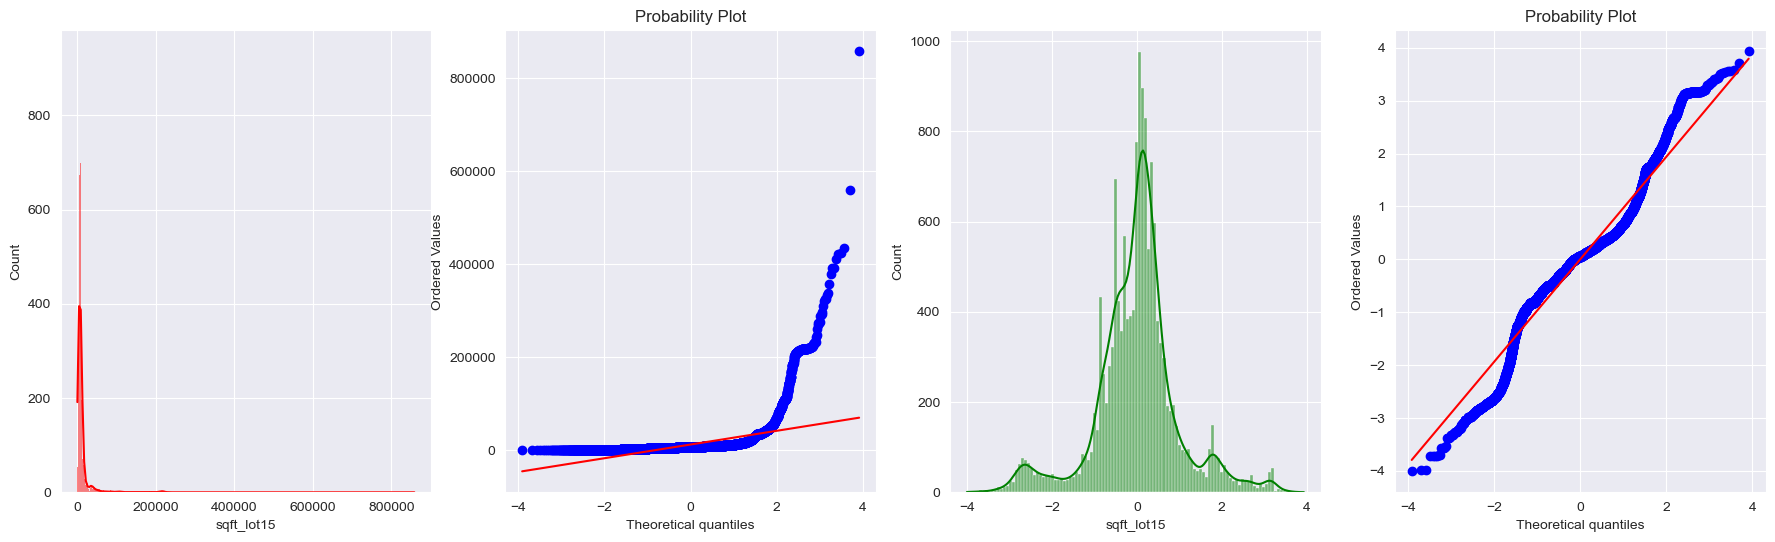

In [48]:
box_cox_transformation(X_train,'sqft_lot15')

In [49]:
from sklearn.preprocessing import PowerTransformer 
boxcox = PowerTransformer(method='box-cox') 

X_test['sqft_lot'] = boxcox.fit_transform(X_test[['sqft_lot']])
X_test['sqft_lot15'] = boxcox.fit_transform(X_test[['sqft_lot15']])

<div class="alert alert-block alert-warning" style="margin-bottom: 20px; font-size: 16px;">
    <b>⚙️ Modeling Insights: </b>
    <ul>
        <li>Several iterations were conducted, involving a range of transformation methods such as log transformation, squaring, square root, Box-Cox, and Yeo-Johnson. </li>
           <li> The most effective transformations were applied to the respective features, enhancing the data's suitability for analysis and modeling.</li>
    </ul>
</div>

<h2 align="left"><font color='FF8C00'><u>3. Feature Scaling </u></font></h2>

In [50]:
Scaling_Features = ['sqft_basement','lat','long']

In [51]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [52]:
X_train[Scaling_Features] = scaler.fit_transform(X_train[Scaling_Features]) # fit the scaler to the train set, and then transform it
X_test[Scaling_Features] = scaler.transform(X_test[Scaling_Features]) # transform the test set

<div class="alert alert-block alert-warning" style="margin-bottom: 20px; font-size: 16px;">
    <b>⚙️ Modeling Insights: </b>
    <ul>
        <li>As per the exploratory data analysis (EDA), it was observed that features like 'sqft_basement,' 'lat,' and 'long' did not follow a Gaussian distribution. Therefore, normalization was implemented to make these features conform to a more standard scale, aiding in training of a model.</li>
    </ul>
</div>

<h2 align="left"><font color='FF8C00'><u>4. Feature Encoding </u></font></h2>

In [53]:
from sklearn.preprocessing import KBinsDiscretizer

est = KBinsDiscretizer(n_bins=6, encode='ordinal', strategy='uniform')
X_train['yr_built']= est.fit_transform(X_train[['yr_built']])
X_test['yr_built']= est.fit_transform(X_test[['yr_built']])

<h3 align="left"><font color='green'>Creating Function - Binning</font></h3>

In [54]:
def custom_binning(year):
    if year == 0:
        return 0
    elif 1934 <= year <= 1950:
        return 1
    elif 1951 <= year <= 1970:
        return 2
    elif 1971 <= year <= 1990:
        return 3
    elif 1991 <= year <= 2010:
        return 4
    else:
        return 5

# Apply the custom binning function to the yr_renovated column
X_train['yr_renovated'] = X_train['yr_renovated'].apply(custom_binning)
X_test['yr_renovated'] = X_test['yr_renovated'].apply(custom_binning)

In [55]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

X_train['zipcode'] = le.fit_transform(X_train['zipcode'])
X_test['zipcode'] = le.fit_transform(X_test['zipcode'])

<div class="alert alert-block alert-warning" style="margin-bottom: 20px; font-size: 16px;">
    <b>⚙️ Modeling Insights: </b>
    <ul>
        <li>From Data Exploration we can say that certain features which exhibited categorical characteristics were by default encoded. 
                <li>view, condition,floors, grade, bedrooms, bathrooms - Default Ordinal Encoded</li>
                <li>waterfront - Default Nominal Encoded</li>
        <li>Zipcode  - Nominal Caegory - Having 70 Unique Values, One-hot Dummy Encoding (k-1) would increase the dimension and lead to overfitting, hence the best suitable method over here would be label Encoding </li>
        <li>For 'yr_built' and 'yr_renovated,' binning or discretization was deemed appropriate to condense and rank the years effectively.r</li>
    </ul>
</div>

<h3 align="left"><font color='green'>Creating Function - Evaluation Metrics</font></h3>

In [56]:
def evaluate_linear_regression(model, X_train, y_train, X_test, y_test):
    # Predict on training and testing data
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)
    
    # Calculate R-squared (R2) for training and testing data
    r2_train = r2_score(y_train, train_pred)
    r2_test = r2_score(y_test, test_pred)
    
    # Calculate RMSE (Root Mean Square Error) for training and testing data
    rmse_test = np.sqrt(mean_squared_error(y_test, test_pred))
    
    # Return the evaluation metrics
    print("R-squared (R2) Train:", r2_train)
    print("R-squared (R2) Test:", r2_test)
    print("RMSE Test:", rmse_test)

<h3 align="left"><font color='green'>Creating Function - Visualizing the Importance of Features</font></h3>

In [57]:
def plot_coefficients(model):
    # Get coefficients and corresponding feature names
    coefficients = model.coef_.ravel()

    # Feature names (your provided feature names)
    feature_names = X_train.columns

    # Create a DataFrame to store the coefficients and feature names
    coefficients_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

    # Calculate absolute coefficients and sort by absolute coefficient value
    coefficients_df['Absolute_Coefficient'] = coefficients_df['Coefficient'].abs()
    coefficients_df = coefficients_df.sort_values(by='Absolute_Coefficient', ascending=False)

    # Create a bar plot with rank labels
    plt.figure(figsize=(10, 6))
    sns.barplot(data=coefficients_df, x='Feature', y='Coefficient', palette='Spectral_r')
    plt.xlabel('Feature')
    plt.ylabel('Coefficient')
    plt.title('Ridge Regression Coefficients (Ranked by Absolute Value)')
    plt.xticks(rotation=90)  # Rotate x-axis labels for better readability

    # Add rank labels to the plot
    for i, rank in enumerate(range(1, len(coefficients_df) + 1)):
        plt.text(i, coefficients_df['Coefficient'].iloc[i], f'{rank}', horizontalalignment='center')

    plt.tight_layout()

    # Display the plot
    plt.show()

In [58]:
from sklearn.metrics import r2_score,mean_squared_error

<div style="color:white;
           display:fill;
           border-radius:20px;
           background-color:#FFA500;
           font-size:200%;
           font-family:Verdana;
           letter-spacing:1px">
<a class="anchor" id="CH-5"></a> 
<p style="padding: 10px;
              color:white;">
              5. Linear Regression 
</p>
</div>

<h2 align="left"><font color='FF8C00'><u>Building Model </u></font></h2>

In [59]:
from sklearn.linear_model import LinearRegression

# Perform Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train,y_train)

LinearRegression()

In [60]:
# Evaluate linar Regression
train_pred = linear_model.predict(X_train)
test_pred = linear_model.predict(X_test)

<h2 align="left"><font color='FF8C00'><u>Model Evaluation</u></font></h2>

In [61]:
evaluate_linear_regression(linear_model, X_train, y_train, X_test, y_test)

R-squared (R2) Train: 0.7724023154233899
R-squared (R2) Test: 0.7770595199876066
RMSE Test: 0.24790031956132202


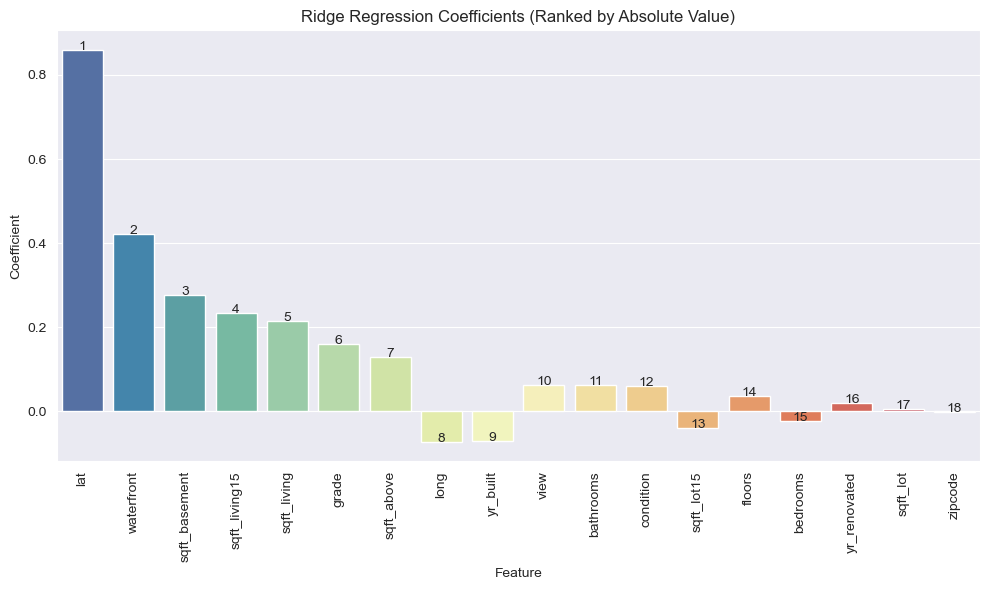

In [62]:
plot_coefficients(linear_model)

<div class="alert alert-block alert-info" style="margin-bottom: 20px;font-size: 16px;">
    <b>📊 Observation and Insights:  </b>
    <ul>
        <li> The model demonstrates strong predictive performance with an R-squared score of 0.77. It effectively explains the variance in both the training and test data, indicating a good balance between fitting the training data and generalizing to new, unseen data. </li>
        <li>There are no apparent issues of overfitting or underfitting, signifying a well-fitted model.</li>
        <li>Among the features, the most influential (top-ranked) are 'latitude,' 'waterfront,' and 'sqft_basement.' In contrast, the least influential (bottom-ranked) features are 'zipcode,' 'sqft_lot,' and 'yr_renovated.' These rankings suggest the varying impact of each feature on predicting property prices.</li>   
    </ul>
</div>


<div style="color:white;
           display:fill;
           border-radius:20px;
           background-color:#FFA500;
           font-size:200%;
           font-family:Verdana;
           letter-spacing:1px">
<a class="anchor" id="CH-6"></a> 
<p style="padding: 10px;
              color:white;">
              6. Ridge Regression 
</p>
</div>

<h2 align="left"><font color='FF8C00'><u>Building Model </u></font></h2>

In [63]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

ridge_model = Ridge()

# Define a range of alpha values to search
param_grid = {'alpha': [0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 
                        0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 
                        6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]}

# Perform hyperparameter tuning with GridSearchCV
grid_search = GridSearchCV(ridge_model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Get the best alpha value
best_alpha_ridge = grid_search.best_params_['alpha']
print("Best Parameter (alpha):", best_alpha_ridge)

Best Parameter (alpha): 0.8


In [64]:
# Fitting the Model
ridge_model = Ridge(alpha=best_alpha_ridge)
ridge_model.fit(X_train, y_train)

# Predicttion
ridge_train_pred = ridge_model.predict(X_train)
ridge_test_pred = ridge_model.predict(X_test)

<h2 align="left"><font color='FF8C00'><u>Model Evaluation</u></font></h2>

In [65]:
evaluate_linear_regression(ridge_model, X_train, y_train, X_test, y_test)

R-squared (R2) Train: 0.7724013577211628
R-squared (R2) Test: 0.7770673259413469
RMSE Test: 0.24789597957926585


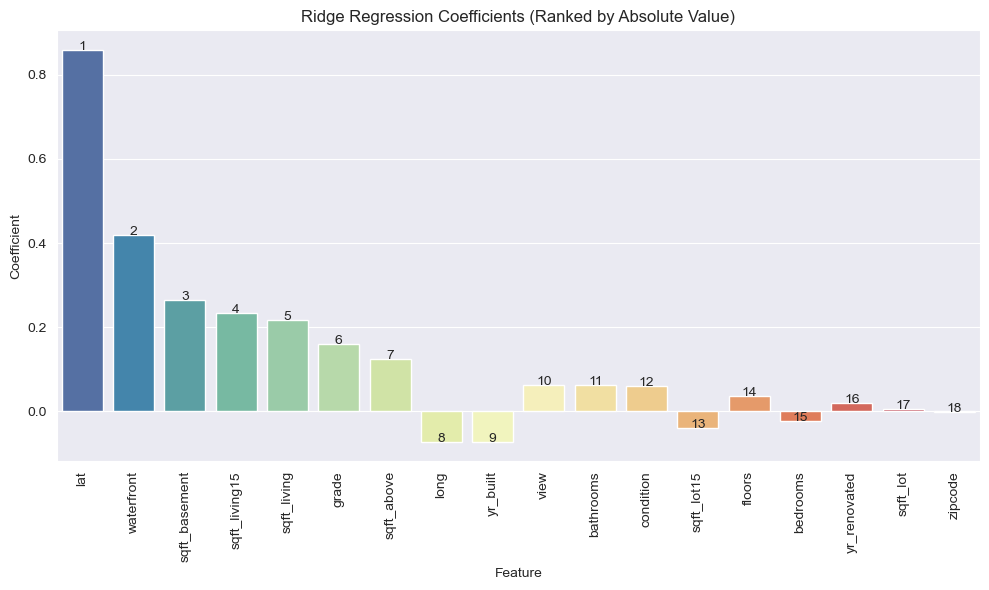

In [66]:
plot_coefficients(ridge_model)

<div class="alert alert-block alert-info" style="margin-bottom: 20px;font-size: 16px;">
    <b>📊 Observation and Insights:  </b>
    <ul>
        <li>Ridge Regression did not yield a substantial improvement in accuracy compared to Linear Regression. While it helped reduce the values of coefficients, pushing them closer to 0 (which can assist in reducing multicollinearity), the ranking of features remained largely unchanged. </li>
            <li>This suggests that for this particular dataset, the added complexity introduced by Ridge Regression did not lead to a significant enhancement in predictive performance.</li>
    </ul>
</div>


<div style="color:white;
           display:fill;
           border-radius:20px;
           background-color:#FFA500;
           font-size:200%;
           font-family:Verdana;
           letter-spacing:1px">
<a class="anchor" id="CH-7"></a> 
<p style="padding: 10px;
              color:white;">
              7. Lasso Regression 
</p>
</div>

<h2 align="left"><font color='FF8C00'><u>Building Model </u></font></h2>

In [67]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
lasso_model = Lasso()
param_grid = {'alpha': [0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

grid_search = GridSearchCV(lasso_model, param_grid, cv=5,scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

best_alpha_lasso = grid_search.best_params_['alpha']
print("Best Parameter (alpha):", best_alpha_lasso)

Best Parameter (alpha): 0.001


In [68]:
lasso_model = Lasso(alpha=best_alpha_lasso)
lasso_model.fit(X_train, y_train)

Lasso(alpha=0.001)

In [69]:
# Evaluate linar Regression
lasso_train_pred = lasso_model.predict(X_train)
lasso_test_pred = lasso_model.predict(X_test)

<h2 align="left"><font color='FF8C00'><u>Model Evaluation</u></font></h2>

In [70]:
evaluate_linear_regression(lasso_model, X_train, y_train, X_test, y_test)

R-squared (R2) Train: 0.7712310788886195
R-squared (R2) Test: 0.7761905465564465
RMSE Test: 0.24838298041655707


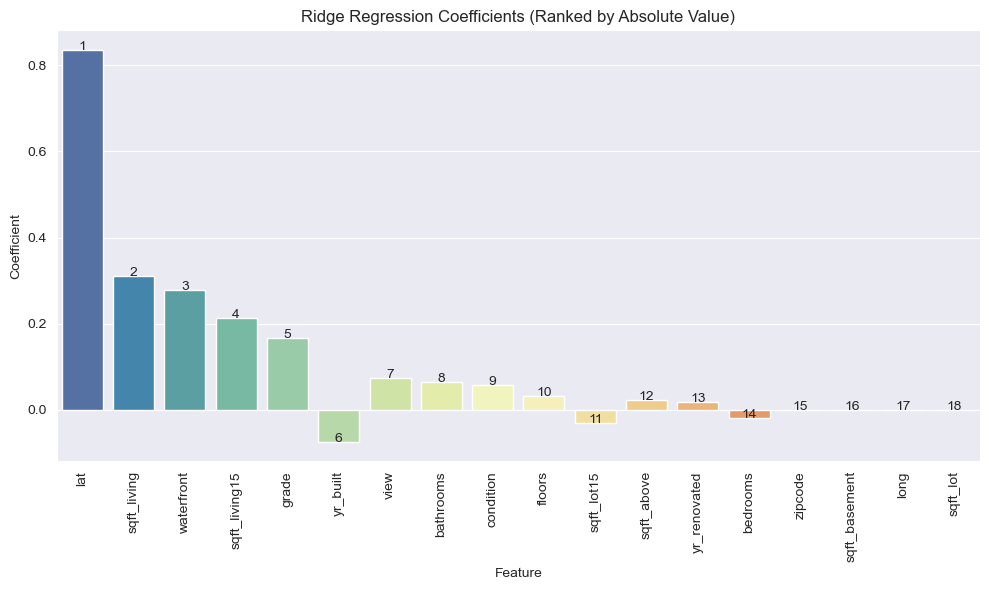

In [71]:
plot_coefficients(lasso_model)

<div class="alert alert-block alert-info" style="margin-bottom: 20px;font-size: 16px;">
    <b>📊 Observation and Insights:  </b>
    <ul>
        <li>The model demonstrates strong predictive performance with an R-squared score of 0.77, indicating its ability to effectively explain the variance in both the training and test data.</li>
        <li>Lasso Regression, in particular, performed exceptionally well by driving the coefficients of four features ('zipcode,' 'sqft_basement,' 'long,' 'sqft_lot') to exactly 0. </li>
           <li> This outcome implies that Lasso successfully eliminated these features from the model, emphasizing its feature selection capabilities and simplifying the model without compromising its predictive performance.</li>
    </ul>
</div>


<div style="color:white;
           display:fill;
           border-radius:20px;
           background-color:#FFA500;
           font-size:200%;
           font-family:Verdana;
           letter-spacing:1px">
<a class="anchor" id="CH-8"></a> 
<p style="padding: 10px;
              color:white;">
              8. Result and Discussion 📈✔️
</p>
</div>

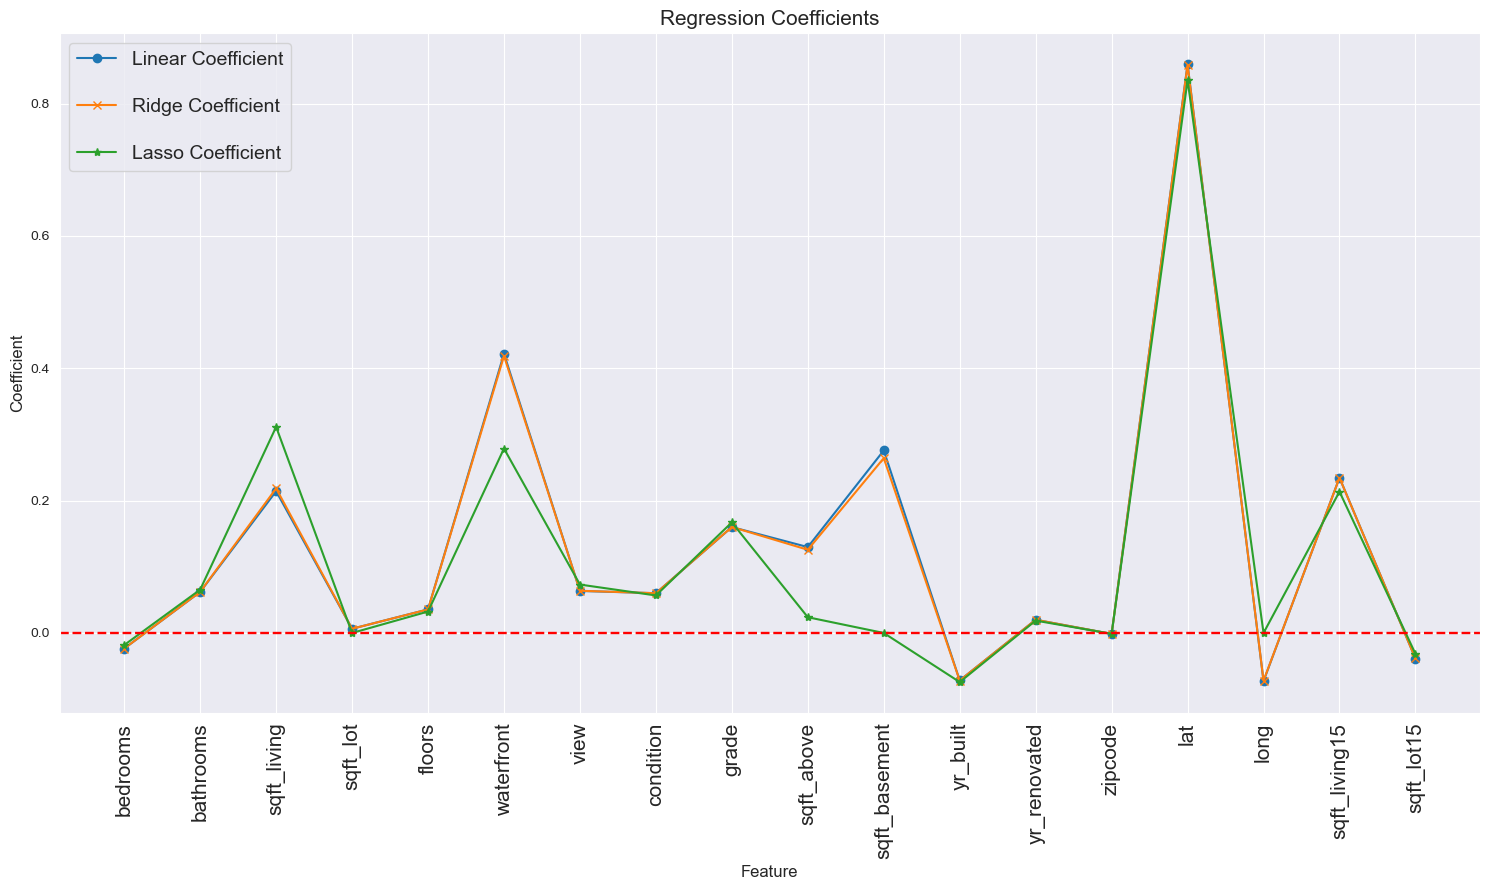

In [72]:
feature_names = X_train.columns # Defining the Feature Names
coefficients_df = pd.DataFrame()

# Create DataFrames for each model's coefficients and feature names
linear_coefficients = pd.DataFrame({'Feature': feature_names, 'Linear Coefficient': linear_model.coef_.ravel()})
ridge_coefficients = pd.DataFrame({'Feature': feature_names, 'Ridge Coefficient': ridge_model.coef_.ravel()})
lasso_coefficients = pd.DataFrame({'Feature': feature_names, 'Lasso Coefficient': lasso_model.coef_.ravel()})

# Merge the DataFrames based on the 'Feature' column
coefficients_df = linear_coefficients.merge(ridge_coefficients, on='Feature').merge(lasso_coefficients, on='Feature')
ticks = range(len(feature_names))  
labels = feature_names  

# Create a line plot for the coefficients
plt.figure(figsize=(15, 9))
plt.plot(ticks, coefficients_df['Linear Coefficient'], marker='o', label='Linear Coefficient')
plt.plot(ticks, coefficients_df['Ridge Coefficient'], marker='x', label='Ridge Coefficient')
plt.plot(ticks, coefficients_df['Lasso Coefficient'], marker='*', label='Lasso Coefficient')
plt.xticks(ticks, labels, rotation=90, fontsize=15)
plt.xlabel('Feature',fontsize=12)
plt.ylabel('Coefficient',fontsize=12)
plt.title('Regression Coefficients',fontsize=15)
plt.tight_layout()
plt.legend(loc='upper left',fontsize=14,labelspacing=1.5)  

# Add a horizontal red line at zero
plt.axhline(0, color='red', linestyle='--', linewidth=1.7)
plt.show()

<div class="alert alert-block alert-success" style="margin-bottom: 20px; font-size: 16px;">  
    <b>Result and Discussion:</b>
    <ul>
        <b>Positive Impact on Price:</b>
        <li>Features such as 'sqft_living,' 'grade,' 'sqft_above,' 'sqft_basement,' 'view,' 'waterfront,' 'lat,' and 'sqft_living15' have positive coefficients in all three models. This indicates that an increase in these features tends to result in a higher predicted price for the property.</li>
                <b>Negative Impact on Price:</b>
        <li>Features like 'bedrooms,' 'yr_built,' 'long,' 'sqft_lot,' 'zipcode,' and 'sqft_lot15' have negative coefficients in all three models. This means that an increase in these features is associated with a lower predicted price for the property.</li>
                <b>Comparison of Models</b>
        <li>The magnitude of coefficients may vary between models. For example, 'sqft_living' has the highest positive coefficient in all three models, but the values differ slightly.
Lasso regression, due to its feature selection property, sets some coefficients to zero. In this case, it sets zipcode,sqft_basement,' 'sqft_lot,' and 'long' coefficients to zero, indicating that these features are not essential in predicting the price.</li>
                <b>Effect of Regularization:</b>
        <li>Ridge and Lasso regression introduce regularization to the model. This is reflected in the Ridge and Lasso coefficients, which are slightly smaller than the Linear coefficients for most features. Regularization helps prevent overfitting and can make the model more robust.</li>
                <b>Feature Importance:</b>
        <li>'lat' and 'sqft_living' appear to be among the most influential features, with high positive coefficients in all three models.</li>
        <li>'sqft_basement' is essentially eliminated in the Lasso model, suggesting it has a limited impact on the price.</li>
        <li>The 'yr_renovated' feature has relatively small coefficients in all models, indicating it may not be a strong predictor of price.</li>
    </ul>
</div>

<div style="color:white;
           display:fill;
           border-radius:20px;
           background-color:#FFA500;
           font-size:200%;
           font-family:Verdana;
           letter-spacing:1px">
<a class="anchor" id="CH-9"></a> 
<p style="padding: 10px;
              color:white;">
              9. Way Forward 📌
</p>
</div>

<div class="alert alert-block alert-warning" style="margin-bottom: 20px; font-size: 16px;">
    <b>⚙️ Way Forward: </b>
    <ul>
         <li>Exploring geospatial information through map integration could help to gain further insights, especially considering the significance of 'latitude' with predictive feature.</li>
        <li>Utilizing an advanced approach for outlier detection and treatment, leveraging clustering methods like K-means and DBSCAN, allowing for more sophisticated handling of outliers.</li>
        <li>The creation of a pipeline might help in streamlining and expedite the modeling process, reducing the time required for trial and error.</li>
        <li>Additionally, experimentation with other feature selection methods, particularly embedded methods such as tree-based algorithms, should be undertaken to identify the most relevant features for modeling.</li>
        <li>Furthermore, various advanced algorithms should be tested, including Decision Trees, Random Forest, AdaBoost, Gradient Boosting, and XGBoost, with the goal of identifying models that require minimal data pre-processing and offer improved predictive performance. </li>
    </ul>
</div>